### **Libraries**

In [1]:
#import libraries
import pandas as pd
import numpy as np
import csv 
import os
import matplotlib.pyplot as plt
import math
import random
import glob
from tqdm import tqdm
from scipy.stats import norm
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import calendar
!pip install --upgrade openpyxl
from google.colab import drive
drive.mount('/content/drive')
from sklearn.preprocessing import OneHotEncoder
from scipy.special import softmax
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib as mpl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#read file
path = "/content/drive/MyDrive/PRSA_Data_20130301-20170228/"
fnames = os.listdir(path)
print(fnames)

['PRSA_Data_Aotizhongxin_20130301-20170228.csv', 'PRSA_Data_Changping_20130301-20170228.csv', 'PRSA_Data_Dingling_20130301-20170228.csv', 'PRSA_Data_Dongsi_20130301-20170228.csv', 'PRSA_Data_Guanyuan_20130301-20170228.csv', 'PRSA_Data_Gucheng_20130301-20170228.csv', 'PRSA_Data_Huairou_20130301-20170228.csv', 'PRSA_Data_Nongzhanguan_20130301-20170228.csv', 'PRSA_Data_Shunyi_20130301-20170228.csv', 'PRSA_Data_Tiantan_20130301-20170228.csv', 'PRSA_Data_Wanliu_20130301-20170228.csv', 'PRSA_Data_Wanshouxigong_20130301-20170228.csv']


In [3]:
#concat data from files
glued_data = pd.DataFrame()
for file_name in glob.glob(path+'*.csv'):
    x = pd.read_csv(file_name, low_memory=False)
    glued_data = pd.concat([glued_data,x],axis=0)

In [4]:
glued_data = glued_data[["year","month","day","hour","SO2","NO2","CO","O3","TEMP","PRES","DEWP","RAIN","wd","WSPM","station","PM2.5","PM10"]]

### **Data Cleaning**

In [5]:
#Concat to create Date column
glued_data['Date_time'] = pd.to_datetime(glued_data[['year','month','day','hour']])
glued_data['Date'] = pd.to_datetime(glued_data[['year','month','day']])
glued_data.head(5)

,year,month,day,hour,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,PM2.5,PM10,Date_time,Date
0,2013,3,1,0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,4.0,4.0,2013-03-01 00:00:00,2013-03-01
1,2013,3,1,1,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,8.0,8.0,2013-03-01 01:00:00,2013-03-01
2,2013,3,1,2,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,7.0,7.0,2013-03-01 02:00:00,2013-03-01
3,2013,3,1,3,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,6.0,6.0,2013-03-01 03:00:00,2013-03-01
4,2013,3,1,4,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,3.0,3.0,2013-03-01 04:00:00,2013-03-01


In [6]:
#Remove duplicate values from dataframe
glued_data.drop_duplicates()

,year,month,day,hour,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,PM2.5,PM10,Date_time,Date
0,2013,3,1,0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,4.0,4.0,2013-03-01 00:00:00,2013-03-01
1,2013,3,1,1,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,8.0,8.0,2013-03-01 01:00:00,2013-03-01
2,2013,3,1,2,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,7.0,7.0,2013-03-01 02:00:00,2013-03-01
3,2013,3,1,3,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,6.0,6.0,2013-03-01 03:00:00,2013-03-01
4,2013,3,1,4,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,3.0,3.0,2013-03-01 04:00:00,2013-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2017,2,28,19,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong,11.0,32.0,2017-02-28 19:00:00,2017-02-28
35060,2017,2,28,20,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong,13.0,32.0,2017-02-28 20:00:00,2017-02-28
35061,2017,2,28,21,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong,14.0,28.0,2017-02-28 21:00:00,2017-02-28
35062,2017,2,28,22,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong,12.0,23.0,2017-02-28 22:00:00,2017-02-28


In [7]:
#fill NA with median by station per day
glued_data['TEMP'] = glued_data.groupby(['Date','station'])['TEMP'].transform(lambda x: x.fillna(x.median()))
glued_data['PRES'] = glued_data.groupby(['Date','station'])['PRES'].transform(lambda x: x.fillna(x.median()))
glued_data['DEWP'] = glued_data.groupby(['Date','station'])['DEWP'].transform(lambda x: x.fillna(x.median()))
glued_data['RAIN'] = glued_data.groupby(['Date','station'])['RAIN'].transform(lambda x: x.fillna(x.median()))
glued_data['WSPM'] = glued_data.groupby(['Date','station'])['WSPM'].transform(lambda x: x.fillna(x.median()))
glued_data['PM10'] = glued_data.groupby(['Date','station'])['PM10'].transform(lambda x: x.fillna(x.median()))
glued_data['PM2.5'] = glued_data.groupby(['Date','station'])['PM2.5'].transform(lambda x: x.fillna(x.median()))
glued_data['SO2'] = glued_data.groupby(['Date','station'])['SO2'].transform(lambda x: x.fillna(x.median()))
glued_data['NO2'] = glued_data.groupby(['Date','station'])['NO2'].transform(lambda x: x.fillna(x.median()))
glued_data['O3'] = glued_data.groupby(['Date','station'])['O3'].transform(lambda x: x.fillna(x.median()))

/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/p

In [8]:
#replace days with no records with 0 value
glued_data['SO2'] = glued_data['SO2'].replace(np.nan, 0)
glued_data['NO2'] = glued_data['NO2'].replace(np.nan, 0)
glued_data['CO'] = glued_data['CO'].replace(np.nan, 0)
glued_data['O3'] = glued_data['O3'].replace(np.nan, 0)
glued_data['PM2.5'] = glued_data['PM2.5'].replace(np.nan, 0)
glued_data['PM10'] = glued_data['PM10'].replace(np.nan, 0)
glued_data['wd'] = glued_data['wd'].replace(np.nan, 0)

In [9]:
#data for correlation matrix
corrData = glued_data.copy(deep=True)

In [10]:
corrData

,year,month,day,hour,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,PM2.5,PM10,Date_time,Date
0,2013,3,1,0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,4.0,4.0,2013-03-01 00:00:00,2013-03-01
1,2013,3,1,1,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,8.0,8.0,2013-03-01 01:00:00,2013-03-01
2,2013,3,1,2,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,7.0,7.0,2013-03-01 02:00:00,2013-03-01
3,2013,3,1,3,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,6.0,6.0,2013-03-01 03:00:00,2013-03-01
4,2013,3,1,4,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,3.0,3.0,2013-03-01 04:00:00,2013-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2017,2,28,19,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong,11.0,32.0,2017-02-28 19:00:00,2017-02-28
35060,2017,2,28,20,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong,13.0,32.0,2017-02-28 20:00:00,2017-02-28
35061,2017,2,28,21,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong,14.0,28.0,2017-02-28 21:00:00,2017-02-28
35062,2017,2,28,22,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong,12.0,23.0,2017-02-28 22:00:00,2017-02-28


In [11]:
#Molecular weight of different gases
molecular_wt_O3 = 47.998
molecular_wt_CO = 28.01
molecular_wt_SO2 = 64.065
molecular_wt_NO2 = 46.006

#converting the O3, CO column values from (ug/m^3 to ppm)
glued_data['O3_ppm'] = (glued_data["O3"]/1000) * (22.4/molecular_wt_O3) * ((273 + glued_data["TEMP"])/273) * (1013/glued_data["PRES"])
glued_data['CO_ppm'] = (glued_data["CO"]/1000) * (22.4/molecular_wt_CO) * ((273 + glued_data["TEMP"])/273) * (1013/glued_data["PRES"])

#converting the O3, CO column values from (ug/m^3 to ppb)
glued_data['SO2_ppb'] = (glued_data["SO2"]) * (22.4/molecular_wt_SO2) * ((273 + glued_data["TEMP"])/273) * (1013/glued_data["PRES"])
glued_data['NO2_ppb'] = (glued_data["NO2"]) * (22.4/molecular_wt_NO2) * ((273 + glued_data["TEMP"])/273) * (1013/glued_data["PRES"])

In [12]:
#converting temp from celcius to kelvin 
glued_data['TEMP'] = glued_data['TEMP'].add(273)

In [13]:
#Filling values with 24 hour rolling average 
glued_data["PM10_24hr_avg"] = glued_data.groupby("station")["PM10"].rolling(window = 24).mean().values
glued_data["PM2.5_24hr_avg"] = glued_data.groupby("station")["PM2.5"].rolling(window = 24).mean().values
glued_data["SO2_24hr_avg"] = glued_data.groupby("station")["SO2_ppb"].rolling(window = 24).mean().values
glued_data["NO2_24hr_avg"] = glued_data.groupby("station")["NO2_ppb"].rolling(window = 24).mean().values
#Filling values with 8 hour rolling average 
glued_data["CO_8hr_max"] = glued_data.groupby("station")["CO_ppm"].rolling(window = 8).max().values
glued_data["O3_8hr_max"] = glued_data.groupby("station")["O3_ppm"].rolling(window = 8).max().values
glued_data.head(10)

,year,month,day,hour,SO2,NO2,CO,O3,TEMP,PRES,...,O3_ppm,CO_ppm,SO2_ppb,NO2_ppb,PM10_24hr_avg,PM2.5_24hr_avg,SO2_24hr_avg,NO2_24hr_avg,CO_8hr_max,O3_8hr_max
0,2013,3,1,0,4.0,7.0,300.0,77.0,272.3,1023.0,...,0.035492,0.236960,1.381357,3.366281,NaN,NaN,NaN,NaN,NaN,NaN
1,2013,3,1,1,4.0,7.0,300.0,77.0,271.9,1023.2,...,0.035433,0.236566,1.379058,3.360679,NaN,NaN,NaN,NaN,NaN,NaN
2,2013,3,1,2,5.0,10.0,300.0,73.0,271.9,1023.5,...,0.033583,0.236496,1.723318,4.799563,NaN,NaN,NaN,NaN,NaN,NaN
3,2013,3,1,3,11.0,11.0,300.0,72.0,271.6,1024.5,...,0.033054,0.236005,3.783419,5.268547,NaN,NaN,NaN,NaN,NaN,NaN
4,2013,3,1,4,12.0,12.0,300.0,72.0,271.0,1025.2,...,0.032958,0.235323,4.115437,5.730893,NaN,NaN,NaN,NaN,NaN,NaN
5,2013,3,1,5,18.0,18.0,400.0,66.0,270.8,1025.6,...,0.030178,0.313410,6.166193,8.586645,NaN,NaN,NaN,NaN,NaN,NaN
6,2013,3,1,6,18.0,32.0,500.0,50.0,270.4,1026.5,...,0.022808,0.390840,6.151687,15.229234,NaN,NaN,NaN,NaN,NaN,NaN
7,2013,3,1,7,19.0,41.0,500.0,43.0,271.4,1027.4,...,0.019670,0.391942,6.511752,19.567461,NaN,NaN,NaN,NaN,0.391942,0.035492
8,2013,3,1,8,16.0,43.0,500.0,45.0,273.1,1028.3,...,0.020696,0.394052,5.513100,20.632443,NaN,NaN,NaN,NaN,0.394052,0.035433
9,2013,3,1,9,12.0,28.0,400.0,59.0,274.2,1028.5,...,0.027239,0.316450,4.150672,13.486571,NaN,NaN,NaN,NaN,0.394052,0.033583


In [14]:
corrData

,year,month,day,hour,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,PM2.5,PM10,Date_time,Date
0,2013,3,1,0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,4.0,4.0,2013-03-01 00:00:00,2013-03-01
1,2013,3,1,1,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,8.0,8.0,2013-03-01 01:00:00,2013-03-01
2,2013,3,1,2,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,7.0,7.0,2013-03-01 02:00:00,2013-03-01
3,2013,3,1,3,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,6.0,6.0,2013-03-01 03:00:00,2013-03-01
4,2013,3,1,4,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,3.0,3.0,2013-03-01 04:00:00,2013-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2017,2,28,19,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong,11.0,32.0,2017-02-28 19:00:00,2017-02-28
35060,2017,2,28,20,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong,13.0,32.0,2017-02-28 20:00:00,2017-02-28
35061,2017,2,28,21,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong,14.0,28.0,2017-02-28 21:00:00,2017-02-28
35062,2017,2,28,22,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong,12.0,23.0,2017-02-28 22:00:00,2017-02-28


In [15]:
def get_PM25_index(x):
    if x <= 12:
        return x * 50 / 12
    elif x <= 35.4:
        return 51 + (x - 12.10) * (100 - 51) / (35.4 - 12.1)
    elif x <= 55.4:
        return 101 + (x - 35.5) * (150 - 101) / (55.4 - 35.5)
    elif x <= 150.4:
        return 151 + (x - 55.5) * (200 - 151) / (150.4 - 55.5)
    elif x <= 250.4:
        return 201 + (x - 150.5) * (300 - 201) / (250.4 - 150.5)
    elif x <= 350.4:
        return 301 + (x - 250.5) * (400 - 301) / (350.4 - 250.5)
    elif x <= 500.4:
        return 401 + (x - 350.5) * (500 - 401) / (500.4 - 350.5)
    else:
        return 0

glued_data["PM2.5_Index"] = glued_data["PM2.5_24hr_avg"].apply(lambda x: get_PM25_index(x))

In [16]:
def get_PM10_index(x):
    if x <= 54:
        return x * 50 / 54
    elif x <= 154:
        return 51 + (x - 55) * (100 - 51) / (154 - 55)
    elif x <= 254:
        return 101 + (x - 155) * (150 - 101) / (254 - 155)
    elif x <= 354:
        return 151 + (x - 255) * (200 - 151) / (354 - 255)
    elif x <= 424:
        return 201 + (x - 355) * (300 - 201) / (424 - 355)
    elif x <= 504:
        return 301 + (x - 425) * (400 - 301) / (504 - 425)
    elif x <= 604:
        return 401 + (x - 504) * (500 - 401) / (604 - 504)
    else:
        return 0

glued_data["PM10_Index"] = glued_data["PM10_24hr_avg"].apply(lambda x: get_PM10_index(x))

In [17]:
def get_SO2_index(x):
    if x <= 35:
        return x * 50 / 35
    elif x <= 75:
        return 51 + (x - 36) * (100 - 51) / (75 - 36)
    elif x <= 185:
        return 101 + (x - 76) * (150 - 101) / (185 - 76)
    elif x <= 304:
        return 151 + (x - 186) * (200 - 151) / (304 - 186)
    elif x <= 604:
        return 201 + (x - 305) * (300 - 201) / (604 - 305)
    elif x <= 804:
        return 301 + (x - 605) * (400 - 301) / (804 - 605)
    elif x <= 1004:
        return 401 + (x - 805) * (500 - 401) / (1004 - 805)
    else:
        return 0

glued_data["SO2_Index"] = glued_data["SO2_24hr_avg"].apply(lambda x: get_SO2_index(x))

In [18]:
def get_NO2_index(x):
    if x <= 53:
        return x * 50 / 53
    elif x <= 100:
        return 51 + (x - 54) * (100 - 51) / (100 - 54)
    elif x <= 360:
        return 101 + (x - 101) * (150 - 101) / (360 - 101)
    elif x <= 649:
        return 151 + (x - 361) * (200 - 151) / (649 - 361)
    elif x <= 1249:
        return 201 + (x - 650) * (300 - 201) / (1249 - 650)
    elif x <= 1649:
        return 301 + (x - 1250) * (400 - 301) / (1649 - 1250)
    elif x <= 2049:
        return 401 + (x - 1650) * (500 - 401) / (2049 - 1650)
    else:
        return 0

glued_data["NO2_Index"] = glued_data["NO2_24hr_avg"].apply(lambda x: get_NO2_index(x))

In [19]:
def get_CO_index(x):
    if x <= 4.4:
        return x * 50 / 4.4
    elif x <= 9.4:
        return 51 + (x - 4.5) * (100 - 51) / (9.4 - 4.5)
    elif x <= 12.4:
        return 101 + (x - 9.5) * (150 - 101) / (12.4 - 9.5)
    elif x <= 15.4:
        return 151 + (x - 12.5) * (200 - 151) / (15.4 - 12.5)
    elif x <= 30.4:
        return 201 + (x - 15.5) * (300 - 201) / (30.4 - 15.5)
    elif x <= 40.4:
        return 301 + (x - 30.5) * (400 - 301) / (40.4 - 30.5)
    elif x <= 50.4:
        return 401 + (x - 40.5) * (500 - 401) / (50.4 - 40.5)
    else:
        return 0

glued_data["CO_Index"] = glued_data["CO_8hr_max"].apply(lambda x: get_CO_index(x))

In [20]:
def get_O3_index(x):
    if x <= 0.054:
        return x * 50 / 0.054
    elif x <= 0.070:
        return 51 + (x - 0.055) * (100 - 51) / (0.070 - 0.055)
    elif x <= 0.085:
        return 101 + (x - 0.071) * (150 - 101) / (0.085 - 0.071)
    elif x <= 0.105:
        return 151 + (x - 0.086) * (200 - 151) / (0.105 - 0.086)
    elif x <= 0.200:
        return 201 + (x - 0.106) * (300 - 201) / (0.200 - 0.106)
    elif x <= 0.404:
        return 301 + (x - 0.201) * (400 - 301) / (0.404 - 0.201)
    elif x <= 0.604:
        return 401 + (x - 0.405) * (500 - 401) / (0.604 - 0.405)
    else:
        return 0

glued_data["O3_Index"] = glued_data["O3_8hr_max"].apply(lambda x: get_O3_index(x))

In [21]:
def get_AQI_category(x):
    if x <= 50:
        return "Good"
    elif x <= 100:
        return "Moderate"
    elif x <= 150:
        return "Unhealthy for Sensitive Groups"
    elif x <= 200:
        return "Unhealthy"
    elif x <= 300:
        return "Very unhealthy"
    elif x > 300:
        return "Hazardous"
    else:
        return np.NaN

glued_data["Checks"] = (glued_data["PM2.5_Index"] > 0).astype(int) + \
                (glued_data["PM10_Index"] > 0).astype(int) + \
                (glued_data["SO2_Index"] > 0).astype(int) + \
                (glued_data["NO2_Index"] > 0).astype(int) + \
                (glued_data["CO_Index"] > 0).astype(int) + \
                (glued_data["O3_Index"] > 0).astype(int)

glued_data["AQI_calculated"] = round(glued_data[["PM2.5_Index", "PM10_Index", "SO2_Index", "NO2_Index",
                                 "CO_Index", "O3_Index"]].max(axis = 1))
glued_data["AQI_category"] = glued_data["AQI_calculated"].apply(lambda x: get_AQI_category(x))
glued_data[~glued_data.AQI_calculated.isna()].head(5)

,year,month,day,hour,SO2,NO2,CO,O3,TEMP,PRES,...,O3_8hr_max,PM2.5_Index,PM10_Index,SO2_Index,NO2_Index,CO_Index,O3_Index,Checks,AQI_calculated,AQI_category
0,2013,3,1,0,4.0,7.0,300.0,77.0,272.3,1023.0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,Good
1,2013,3,1,1,4.0,7.0,300.0,77.0,271.9,1023.2,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,Good
2,2013,3,1,2,5.0,10.0,300.0,73.0,271.9,1023.5,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,Good
3,2013,3,1,3,11.0,11.0,300.0,72.0,271.6,1024.5,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,Good
4,2013,3,1,4,12.0,12.0,300.0,72.0,271.0,1025.2,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,Good


In [22]:
#drop zero value from AQI calc
glued_data =glued_data[glued_data['AQI_calculated'] !=0]
glued_data

,year,month,day,hour,SO2,NO2,CO,O3,TEMP,PRES,...,O3_8hr_max,PM2.5_Index,PM10_Index,SO2_Index,NO2_Index,CO_Index,O3_Index,Checks,AQI_calculated,AQI_category
7,2013,3,1,7,19.0,41.0,500.0,43.0,271.4,1027.4,...,0.035492,0.000000,0.000000,0.000000,0.000000,4.453888,32.863261,2,33.0,Good
8,2013,3,1,8,16.0,43.0,500.0,45.0,273.1,1028.3,...,0.035433,0.000000,0.000000,0.000000,0.000000,4.477864,32.808571,2,33.0,Good
9,2013,3,1,9,12.0,28.0,400.0,59.0,274.2,1028.5,...,0.033583,0.000000,0.000000,0.000000,0.000000,4.477864,31.095113,2,31.0,Good
10,2013,3,1,10,9.0,12.0,400.0,72.0,274.9,1028.2,...,0.033335,0.000000,0.000000,0.000000,0.000000,4.477864,30.865801,2,31.0,Good
11,2013,3,1,11,9.0,14.0,400.0,71.0,275.9,1028.2,...,0.033335,0.000000,0.000000,0.000000,0.000000,4.477864,30.865801,2,31.0,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2017,2,28,19,3.0,24.0,400.0,72.0,285.5,1013.5,...,0.042735,62.531474,28.780864,3.126498,20.567165,3.799631,39.569137,6,63.0,Moderate
35060,2017,2,28,20,3.0,41.0,500.0,50.0,284.6,1013.6,...,0.042735,59.464592,26.890432,3.039814,19.271763,4.734099,39.569137,6,59.0,Moderate
35061,2017,2,28,21,4.0,38.0,500.0,54.0,283.8,1014.2,...,0.042735,55.696710,24.845679,2.930354,17.765034,4.734099,39.569137,6,56.0,Moderate
35062,2017,2,28,22,4.0,30.0,400.0,59.0,283.5,1014.4,...,0.042735,52.016452,21.797840,2.733984,16.020714,4.734099,39.569137,6,52.0,Moderate


In [23]:
corrData

,year,month,day,hour,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,PM2.5,PM10,Date_time,Date
0,2013,3,1,0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,4.0,4.0,2013-03-01 00:00:00,2013-03-01
1,2013,3,1,1,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,8.0,8.0,2013-03-01 01:00:00,2013-03-01
2,2013,3,1,2,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,7.0,7.0,2013-03-01 02:00:00,2013-03-01
3,2013,3,1,3,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,6.0,6.0,2013-03-01 03:00:00,2013-03-01
4,2013,3,1,4,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,3.0,3.0,2013-03-01 04:00:00,2013-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2017,2,28,19,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong,11.0,32.0,2017-02-28 19:00:00,2017-02-28
35060,2017,2,28,20,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong,13.0,32.0,2017-02-28 20:00:00,2017-02-28
35061,2017,2,28,21,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong,14.0,28.0,2017-02-28 21:00:00,2017-02-28
35062,2017,2,28,22,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong,12.0,23.0,2017-02-28 22:00:00,2017-02-28


### **Data Visualization**

Text(0.5, 1.0, 'Stations Recording Houry Pollutant Data')

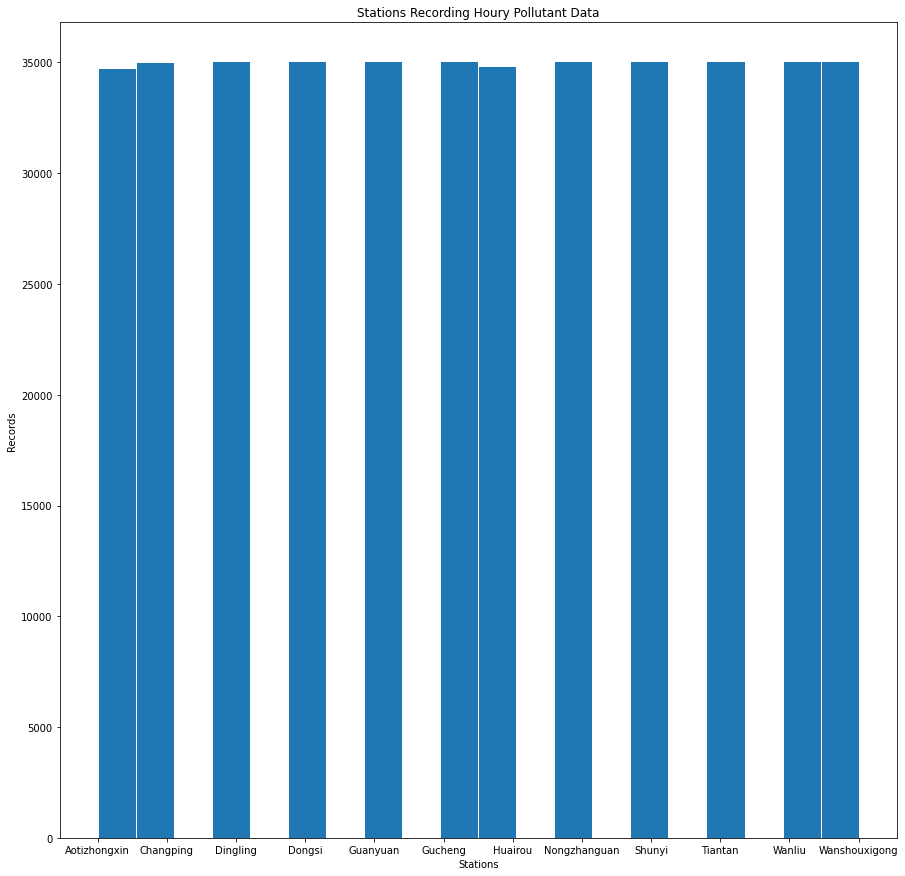

In [25]:
#station names where data is being recorded from
plt.figure(figsize = (15,15))
plt.hist(glued_data['station'].dropna(), bins = 20, edgecolor='w', lw=1)
plt.xlabel('Stations')
plt.ylabel('Records')
plt.title('Stations Recording Houry Pollutant Data')

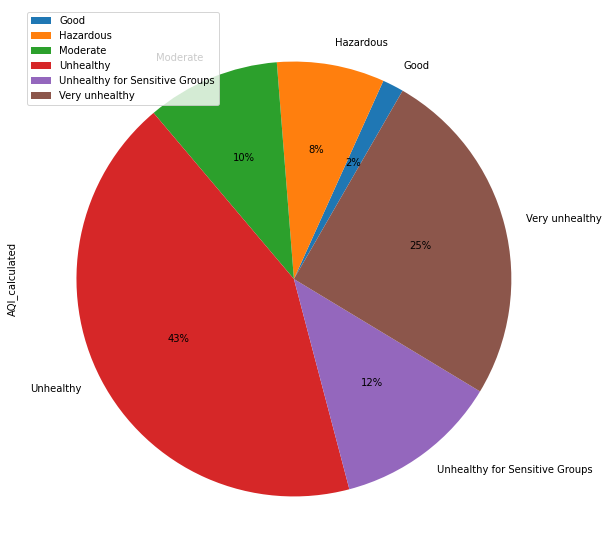

In [26]:
# Generate a pie chart to show portion of days falling into each air quality classification
pieChart = glued_data.groupby(['AQI_category']).sum()
pieChart = pieChart.plot(kind='pie', y='AQI_calculated', autopct='%1.0f%%', startangle=60, figsize=(10, 10))
pieChart

([<matplotlib.axis.XTick at 0x7f6d9aba1110>,
 [Text(0, 0, 'Jan'),
  Text(0, 0, 'Feb'),
  Text(0, 0, 'Mar'),
  Text(0, 0, 'Apr'),
  Text(0, 0, 'May'),
  Text(0, 0, 'Jun'),
  Text(0, 0, 'Jul'),
  Text(0, 0, 'Aug'),
  Text(0, 0, 'Sep'),
  Text(0, 0, 'Oct'),
  Text(0, 0, 'Nov'),
  Text(0, 0, 'Dec')])

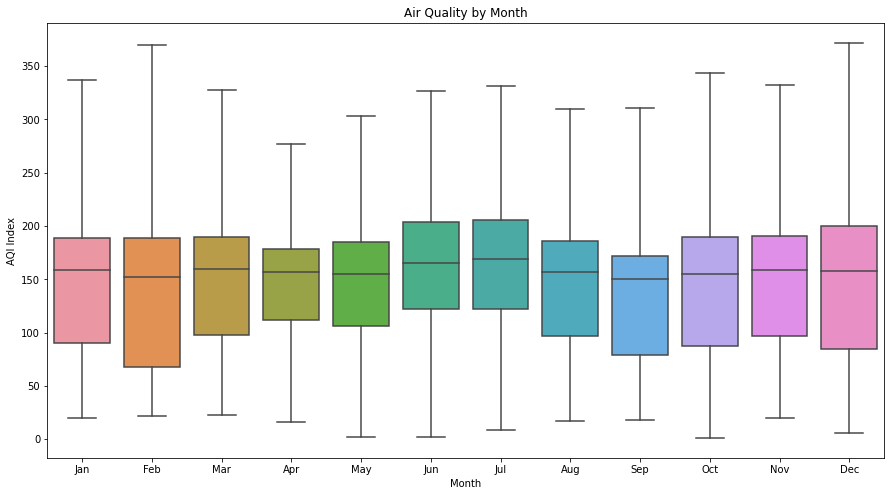

In [27]:
#AQI by month
plt.figure(figsize = (15,8))
sns.boxplot(x="month", y="AQI_calculated", data=glued_data, showfliers=False)
plt.xlabel('Month')
plt.ylabel('AQI Index')
plt.title('Air Quality by Month')
plt.xticks(range(0,12), calendar.month_abbr[1:13])

In [28]:
corrData.columns

Index(['year', 'month', 'day', 'hour', 'SO2', 'NO2', 'CO', 'O3', 'TEMP',
       'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station', 'PM2.5', 'PM10',
       'Date_time', 'Date'],
      dtype='object')

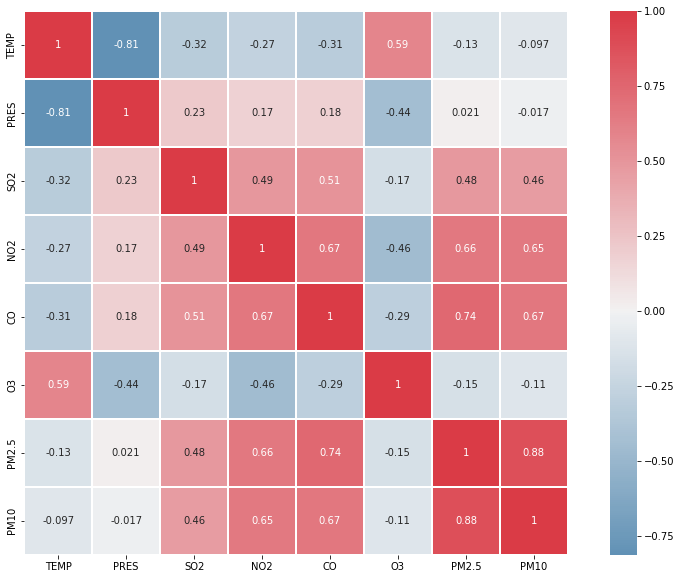

In [29]:
#correlation matrix with original dimensions
correlationMatrix = corrData[["TEMP","PRES","SO2","NO2","CO","O3","PM2.5","PM10"]].corr()
f, ax = plt.subplots(figsize=(15, 10))
cmap = sns.diverging_palette(240, 10, n=9, as_cmap=True)
sns.heatmap(correlationMatrix, cmap=cmap, annot=True, vmax=1, center=0,
            square=True, linewidth=.5);

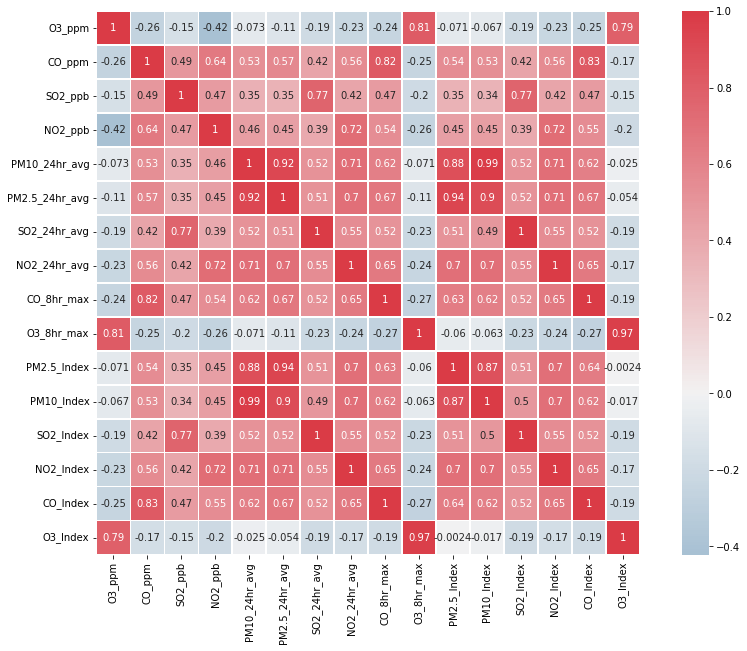

In [30]:
#correlation matrix with calculated dimensions
correlationMatrix = glued_data[['O3_ppm', 'CO_ppm', 'SO2_ppb', 'NO2_ppb','PM10_24hr_avg','PM2.5_24hr_avg','SO2_24hr_avg','NO2_24hr_avg',
       'CO_8hr_max','O3_8hr_max','PM2.5_Index','PM10_Index','SO2_Index',
       'NO2_Index','CO_Index','O3_Index']].corr()
f, ax = plt.subplots(figsize=(15, 10))
cmap = sns.diverging_palette(240, 10, n=9, as_cmap=True)
sns.heatmap(correlationMatrix, cmap=cmap, annot=True, vmax=1, center=0,
            square=True, linewidth=.5);

In [31]:
timeSeries = corrData.set_index('Date')

In [32]:
AQI_bymonth = timeSeries.resample('W').mean()
AQI_bymonth.head()

,year,month,day,hour,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,PM2.5,PM10
Date,,,,,,,,,,,,,,,
2013-03-03,2013.0,3.0,2.0,11.5,30.156561,50.987828,1032.438657,41.303380,2.230556,1022.445949,-16.248611,0.000000,1.842014,39.364583,54.623843
2013-03-10,2013.0,3.0,7.0,11.5,55.061723,88.393259,1964.640873,71.200893,7.921974,1008.608036,-7.972123,0.000000,1.878720,128.688492,173.766369
2013-03-17,2013.0,3.0,14.0,11.5,54.172619,83.318452,1722.552083,72.194444,6.276538,1013.946478,-3.122867,0.021280,1.480060,155.800595,165.768353
2013-03-24,2013.0,3.0,21.0,11.5,16.282738,46.006448,799.503968,48.434923,4.453819,1009.503224,-6.526091,0.083978,2.288740,61.516369,77.979167
2013-03-31,2013.0,3.0,28.0,11.5,32.026561,58.685789,1094.710317,39.558453,6.928819,1012.459077,-5.007341,0.000000,1.917163,101.717262,129.413938


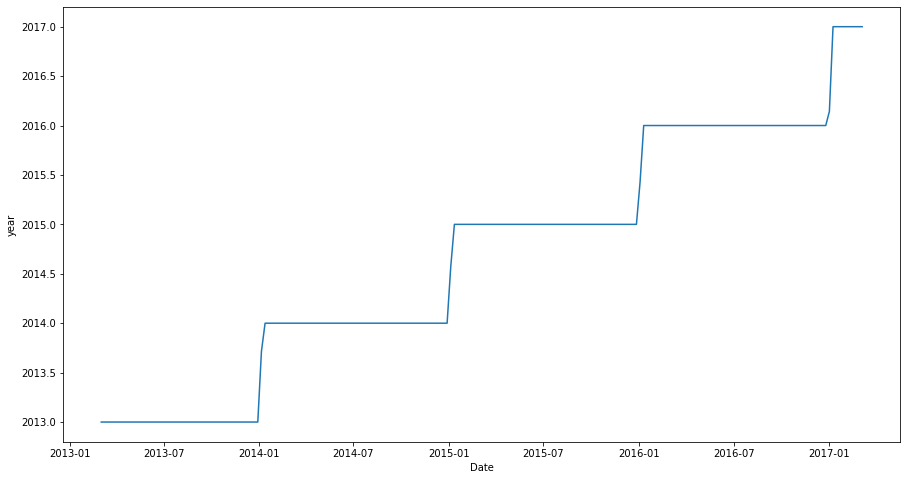

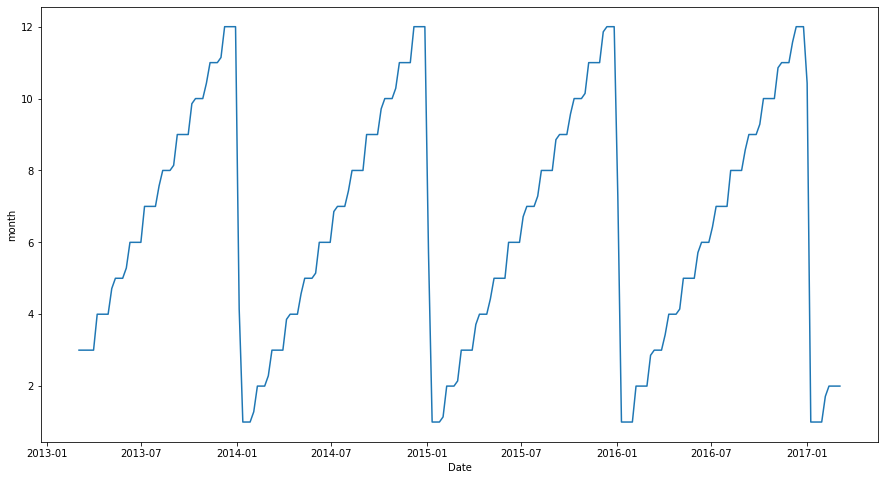

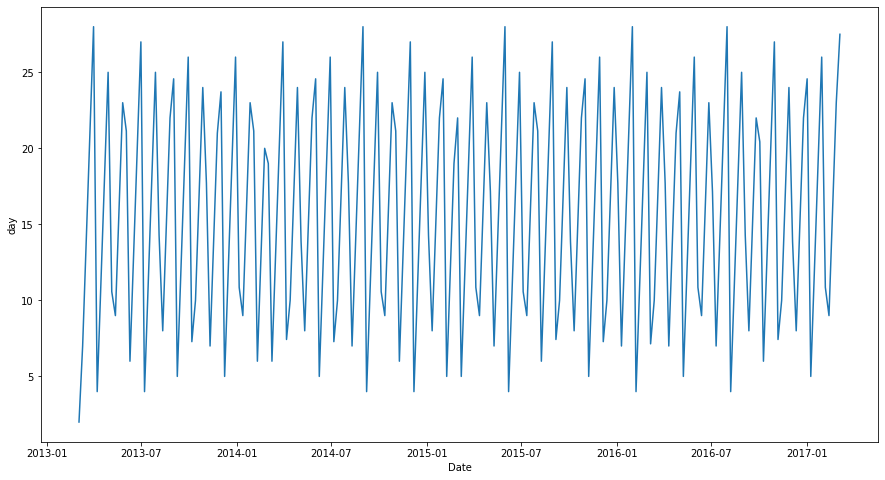

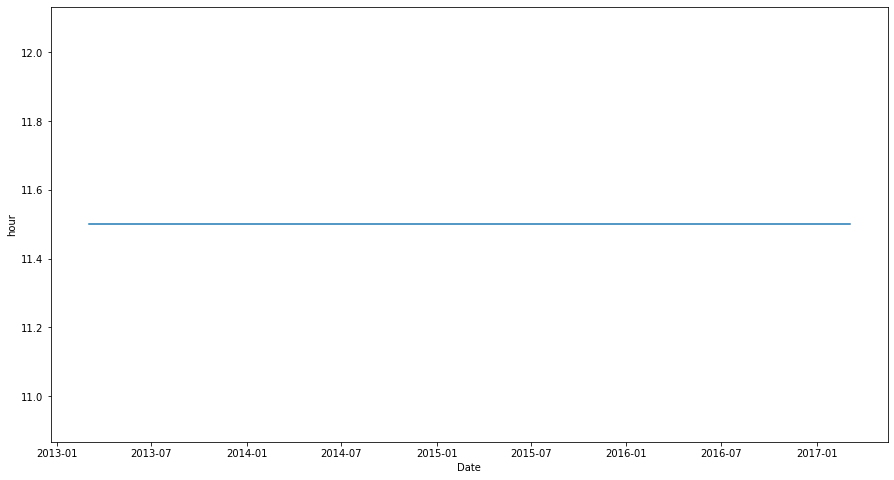

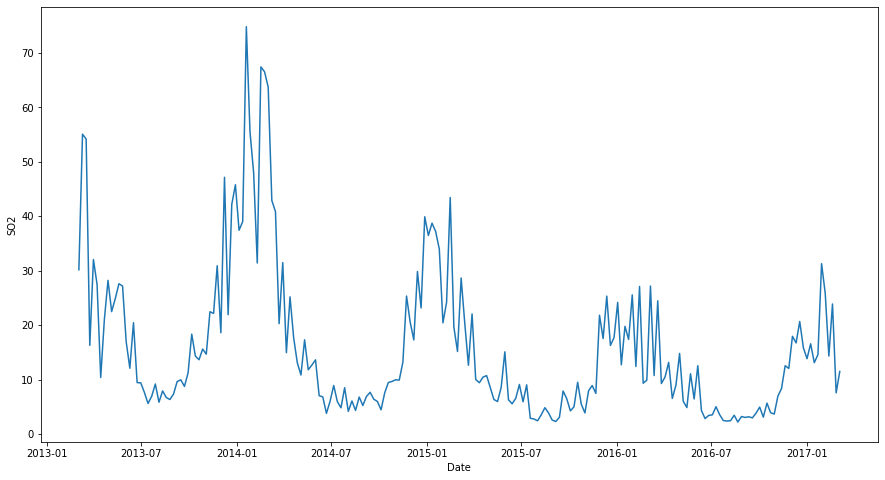

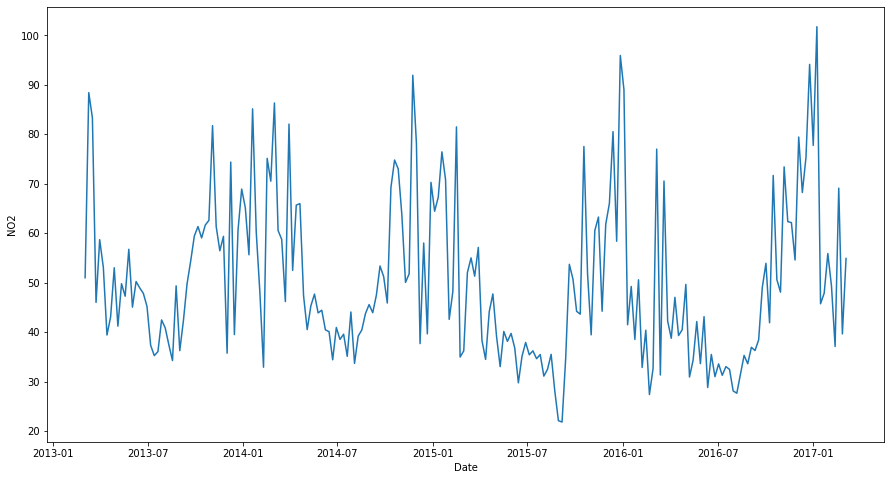

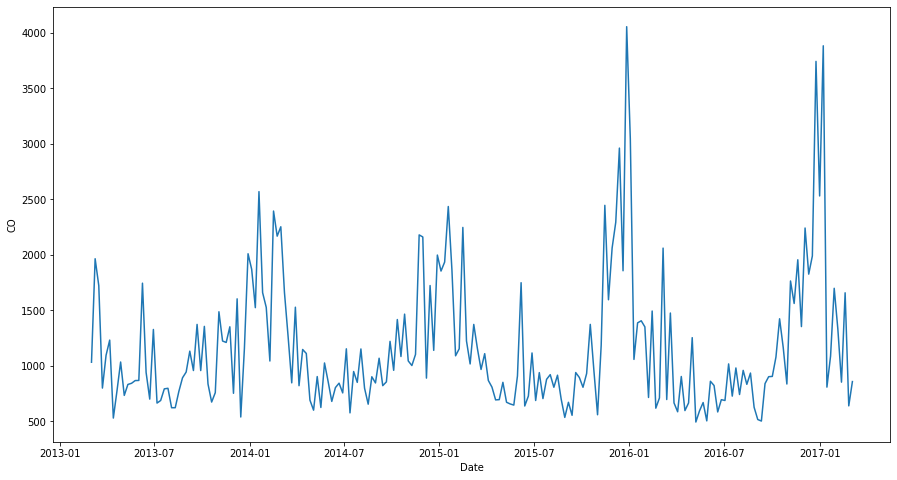

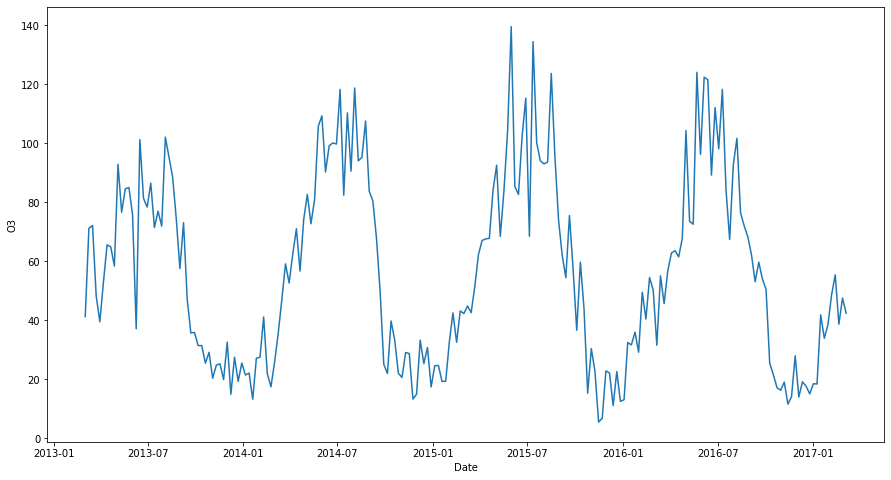

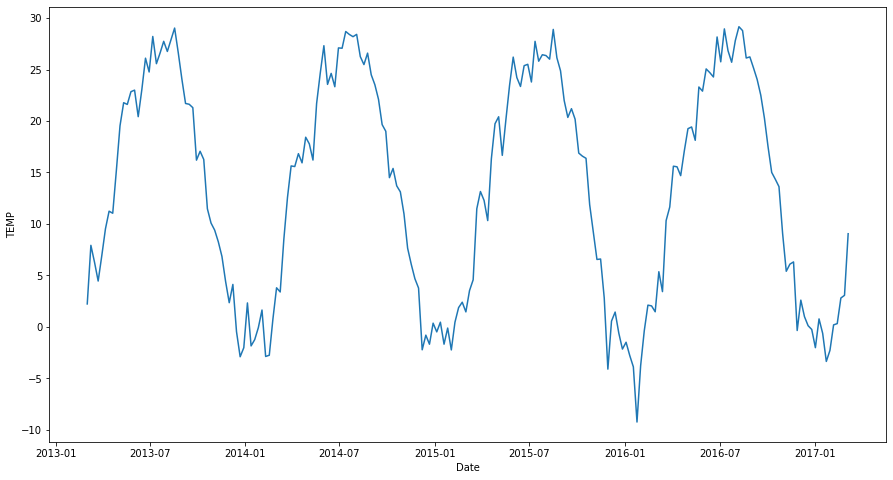

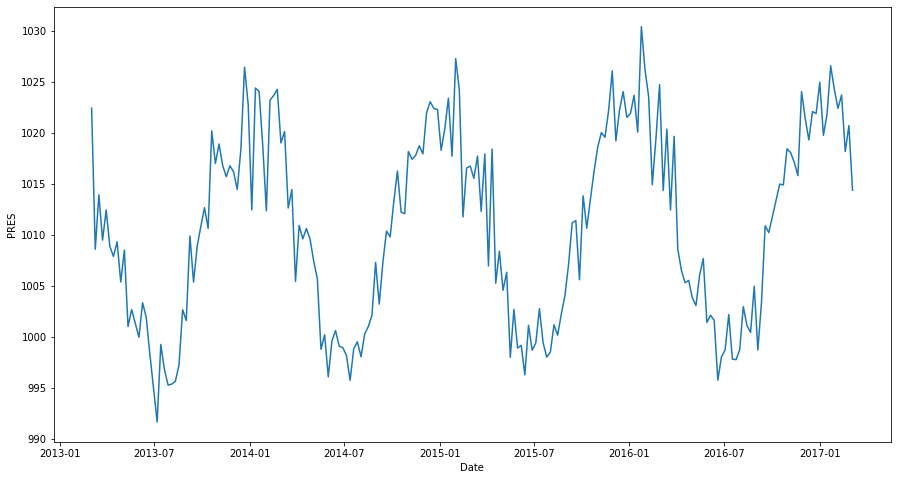

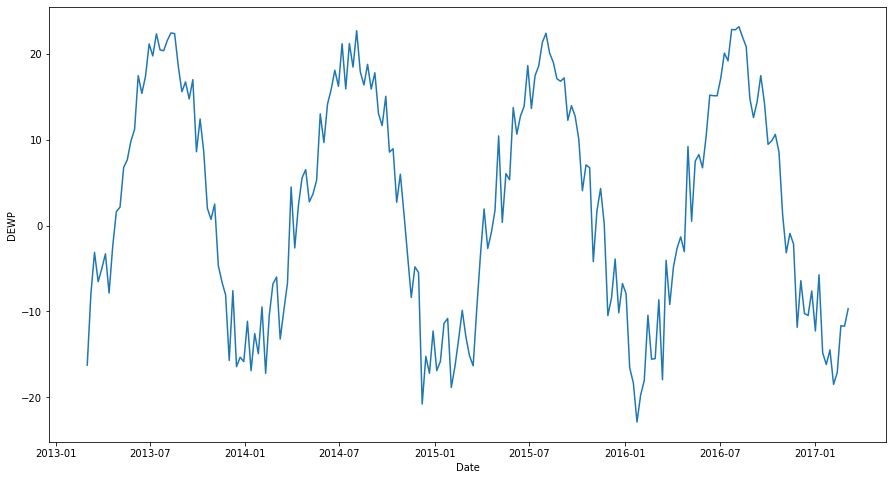

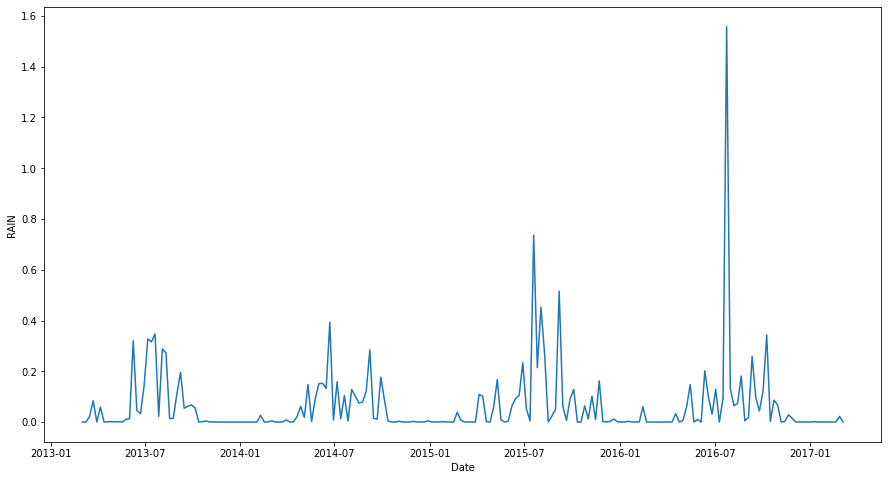

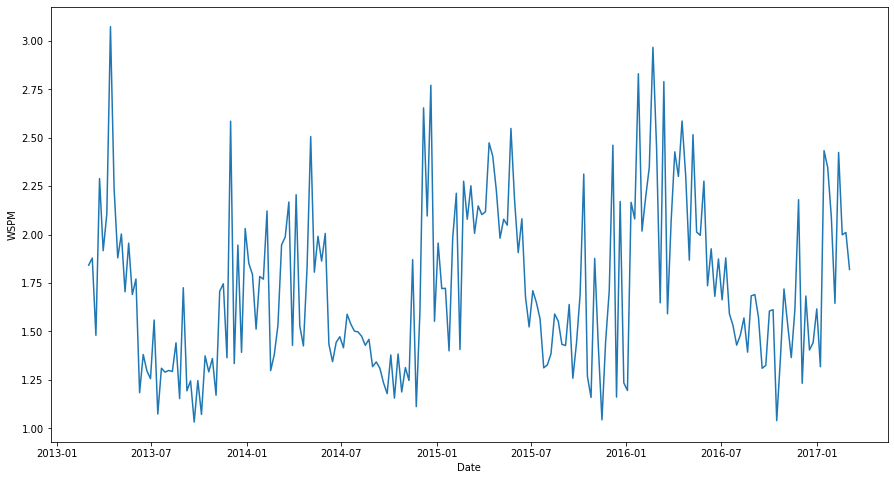

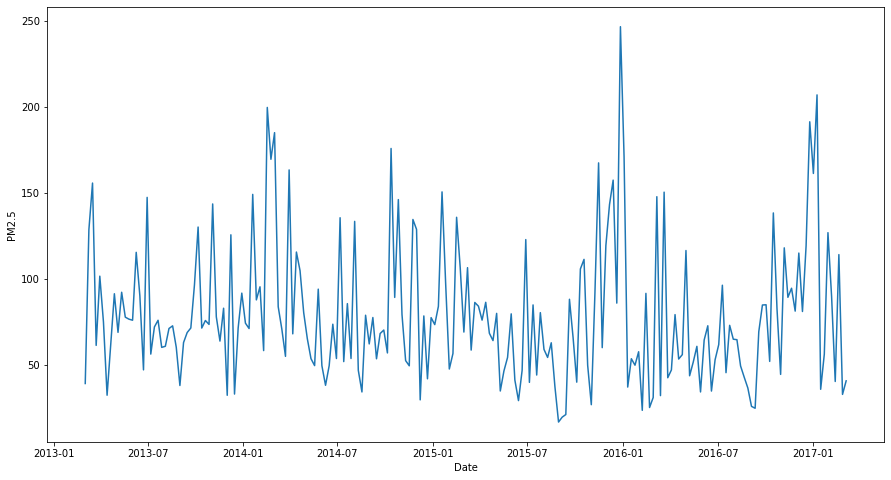

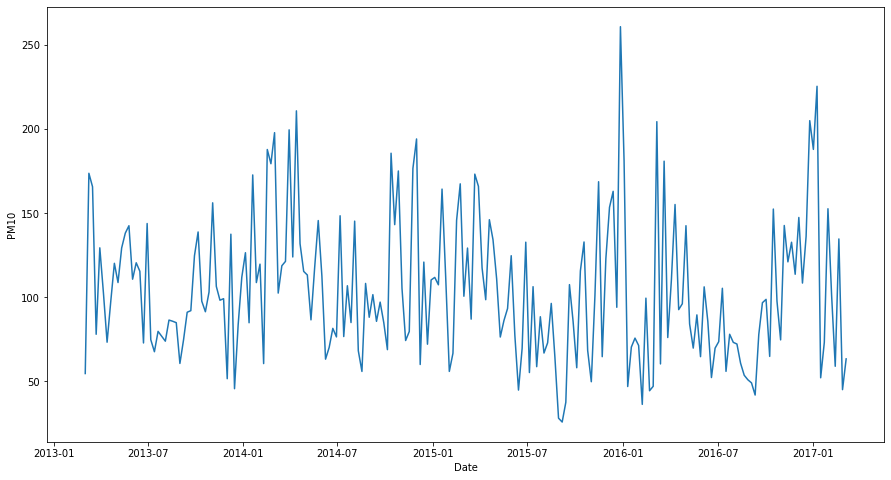

In [33]:
def plot_data(col):
    plt.figure(figsize=(15,8))
    sns.lineplot(y=col ,x='Date',data=AQI_bymonth)
    
    
for col in AQI_bymonth.columns:
    plot_data(col)

### **Linear Regression Model**

In [34]:
class LinearRegression:
    def __init__(self, X,y,learningRate,tolerance,maxIteration,lamda=0.05,batch_size=5000,gd=False,reg=False,sgd=False)->None:
        self.X=X
        self.y=y
        self.tolerance=tolerance
        self.learningRate=learningRate
        self.maxIteration=maxIteration
        self.gd=gd
        self.lamda=lamda
        self.reg=reg
        self.sgd=sgd
        self.batch_size=batch_size

    #Splitting the data into test and train data    
    def trainTestSplit(self):
        X_train,X_test,y_train,y_test=train_test_split(self.X,self.y,test_size=0.3,random_state=42)
        return X_train, X_test,y_train,y_test
    
    # Adding column 1 to the matrix at the start 
    def add_X0(self,X):
        return np.column_stack([np.ones([X.shape[0],1]),X]) 
       
    #Normalizing the training data
    def normalize(self,X):
        mean=np.mean(X,0)
        sd=np.std(X,0)

        X_norm=(X-mean)/sd
        X_norm=self.add_X0(X_norm)

        return X_norm, mean, sd
    
    #Normalizing the test data
    def normalizeTestData(self, X, trainMean,trainSd):
        X_norm=(X-trainMean)/trainSd
        X_norm=self.add_X0(X_norm)
        return X_norm
    
    #Closed-form solution can be applicable if and only if the matrix is full-rank and invertible
    #We need to check if the matrix is full rank?
    def rank(self,X,eps=1e-3):
        u,s,vh=np.linalg.svd(X)
     
        return len([x for x in s if abs(x)>eps]) 
    
    # Checking rank of the matrix
    def checkMatrix(self,X):
        X_rank=np.linalg.matrix_rank(X)
        
        if X_rank==min(X.shape[0],X.shape[1]):
            self.fullRank=True
            print("Data is Full Rank")
        else:
            self.fullRank=False
            print("Data is not Full Rank")
            
    # Checking for invertibility of matrix i.e. if the no of dimentions are greater than or less than rows?
    def checkInvertibility(self,X):
        if X.shape[0]<X.shape[1]:
            self.lowRank=True
            print('X.shape[0]<X.shape[1]')
            print("Data is low Rank")
        else:
            self.lowRank=False
            print("Data is not low Rank")
    
    #Closed form solution
    def closedFormSolution(self,X,y,reg):
        if reg==False:
            print('reg==False')
            w=np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)   
        else:
            print('reg==True')
            w=np.linalg.inv(X.T.dot(X)+ self.lamda*(np.identity(X.shape[1]))).dot(X.T).dot(y)
            print('printing W',w)
        return w    
    
    # Gradient Descent method
    def gradientDescent(self,X,y,reg):
        errorSequences=[]
        last=float('inf')                          
        for t in tqdm(range(self.maxIteration)):    
            random_indices = np.random.choice(X.shape[0],size=1000,replace=False)
 
            # select random samples from dataset
            X_rows = X[random_indices, :]
            y_rows = y[random_indices]    
     
            self.w=self.w-self.learningRate *self.costDerivative(X,y)
            cur=self.sse(X,y)
            diff=last-cur              
            last=cur
            errorSequences.append(cur)


        self.plot(errorSequences)
    
    def stochasticGradientDescent(self,X,y,reg):
        errorSequences=[]
        last=float('inf')                           
        
        print("inside sgd ")
        for i in tqdm(range(self.maxIteration)):
            # random_sample = random.randint(0, X.shape[0])
            random_indices = np.random.choice(X.shape[0],size=1000,replace=False)
 
            # select random samples from dataset
            X_rows = X[random_indices, :]
            y_rows = y[random_indices]
            
            if self.reg > 0:
                self.w = (self.w - (self.learningRate * self.costDerivative(X_rows,y_rows))) + (reg * self.w)
                current_error = self.sse(X_rows,y_rows)
                difference = last - current_error              
                last = current_error
                errorSequences.append(current_error)

                if difference < self.tolerance:
                    print("The SGD model with regularization has stopped learning")
                    self.plot(errorSequences)
                    break

            else:
                self.w = self.w - (self.learningRate* self.costDerivative(X_rows,y_rows))
                current_error = self.sse(X_rows,y_rows)
                difference = last - current_error              
                last = current_error
                errorSequences.append(current_error)
                
                if difference < self.tolerance:
                    print("The SGD model without regularization has stopped learning")
                    self.plot(errorSequences)
                    break
        self.plot(errorSequences)

    def plot(self, errorSequences):
        plt.ticklabel_format(style='plain')
        plt.plot(errorSequences)
        plt.xlabel('Number of Iterations')
        plt.ylabel('Sum of Squared Error')
    
    #Sum of squared errors function 
    def sse(self,X,y):
        y_hat=self.predict(X)
        return ((y_hat-y)**2).sum()

    #Predict Function
    def predict(self,X):
        return X.dot(self.w) #w is theta
    
    #Cost function
    def costFunction(self,X,y):
        return self.rmse(X,y)/2
    
    def rmse(self,X,y):
        y_hat=self.predict(X)
        return np.sqrt((((y_hat-y)**2)/X.shape[0]).sum())
    
    #Cost Derivatives
    def costDerivative(self,X,y):
        y_hat=self.predict(X)
        if self.reg==False:
            # print("cost derivative with reg == false")
            return (y_hat-y).dot(X)
        else:
            # print("cost derivative with reg == true")
            return (y_hat-y).dot(X)+(self.lamda * self.w)

    # def accuracy(y_true, y_hat):
    #     return np.sum(y_true == y_hat) / len(y_true)

    def fitModel(self):
        self.X_train,self.X_test,self.y_train,self.y_test=self.trainTestSplit()
        print("1")
        self.X_train,self.mean,self.sd=self.normalize(self.X_train)
        print("2")
        self.X_test=self.normalizeTestData(self.X_test, self.mean, self.sd)
        print("3")
        
        self.checkMatrix(self.X_train)
        print('check Matrix')
        self.checkInvertibility(self.X_train)
        print('check Invertibility')
        
        if self.fullRank and not self.lowRank and not self.gd and not self.sgd:
            print("Solving using closed form solution")
            self.w=self.closedFormSolution(self.X_train,self.y_train,self.reg)
            
        elif self.gd and not self.sgd:
            print("Solving using gradient descent")
            self.w=np.ones(self.X_train.shape[1],dtype=np.float64)*0
            self.gradientDescent(self.X_train,self.y_train,self.reg)
        else:
            print("Solving using stochastic gradient descent")
            self.w=np.ones(self.X_train.shape[1],dtype=np.float64)*0
            self.stochasticGradientDescent(self.X_train,self.y_train,self.reg)
        print()
        print("Weights: "+str(self.w))
        print("Errors in train dataset:")
        print()
        print("RMSE: "+str(self.rmse(self.X_train,self.y_train)))
        print("SSE: "+str(self.sse(self.X_train,self.y_train)))
        print()
        print("Errors in test dataset:")
        print("RMSE: "+str(self.rmse(self.X_test,self.y_test)))
        print("SSE: "+str(self.sse(self.X_test,self.y_test)))
        # print('Linear Regression Model Accuracy: ', +str(self.accuracy(self.y_test, self.predict)))

In [35]:
#Data
X = glued_data[["TEMP","PRES","PM2.5", "PM10", "O3_ppm", "CO_ppm", "SO2_ppb", "NO2_ppb"]]
y = glued_data["AQI_calculated"]

In [36]:
#Closed Form Solution: learningRate=0.0004, tolerance=0.005, maxIteration=50000, gd=False, ,sgd=False, reg=False
Model1 = LinearRegression(X, y, learningRate=0.0004, tolerance=0.005, 
                              maxIteration=50000, gd=False, reg=False, sgd=False)
Model1.fitModel()


1
2
3
Data is Full Rank
check Matrix
Data is not low Rank
check Invertibility
Solving using closed form solution
reg==False

Weights: [153.05748749   0.27621337  -2.52022818  47.56296353  -0.17197961
  16.89128779   5.59954117  -1.52234996   1.96033238]
Errors in train dataset:

RMSE: 49.05230101183196
SSE: 707555693.1662903

Errors in test dataset:
RMSE: 49.300491990316566
SSE: 306315907.3996894


1
2
3
Data is Full Rank
check Matrix
Data is not low Rank
check Invertibility
Solving using gradient descent


100%|██████████| 50/50 [00:01<00:00, 33.73it/s]



Weights: [-3.99570698e+118  1.14413879e+133 -8.23053165e+132 -1.93435065e+133
 -1.85314487e+133  1.10468119e+133 -1.93821082e+133 -1.54526775e+133
 -1.88272931e+133]
Errors in train dataset:

RMSE: 8.717158530538959e+133
SSE: 2.234558602346733e+273

Errors in test dataset:
RMSE: 8.710438892149299e+133
SSE: 9.561964366306685e+272


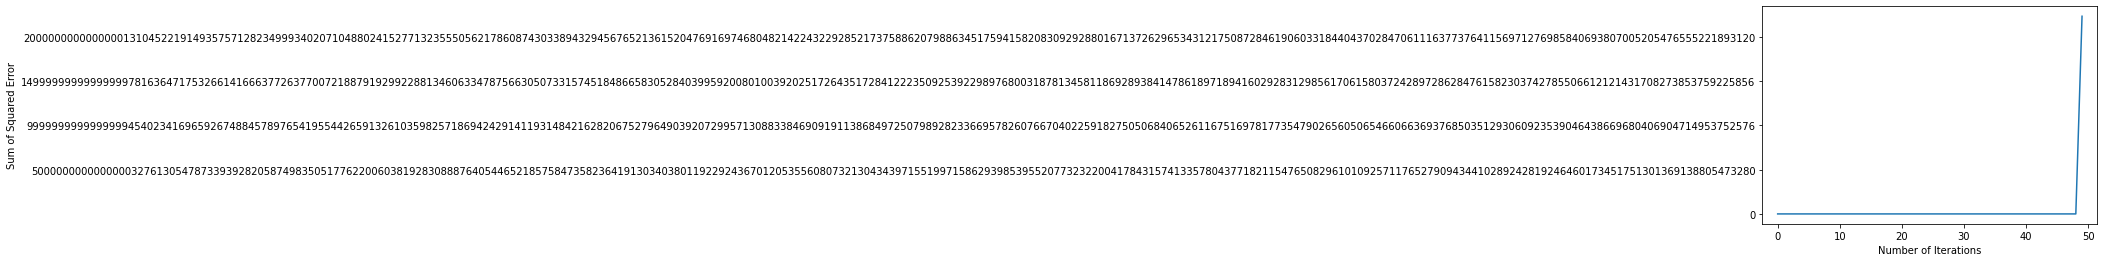

In [37]:
#Solving using gradient descent: learningRate=0.0004, tolerance=0.005, maxIteration=50000, gd=True, ,sgd=False, reg=False
Model1=LinearRegression(X,y.to_numpy(), learningRate=0.0004, tolerance=0.005, 
                        maxIteration=50,gd=True,sgd=False, reg=False)
Model1.fitModel()

1
2
3
Data is Full Rank
check Matrix
Data is not low Rank
check Invertibility
Solving using stochastic gradient descent
inside sgd 


  0%|          | 6/50000 [00:00<16:56, 49.18it/s]


The SGD model without regularization has stopped learning

Weights: [148.05843326   2.15723429  -2.17199975  25.62043223  14.28438238
  14.39563778  11.96324802   1.9645035    3.72412165]
Errors in train dataset:

RMSE: 50.34961786042174
SSE: 745476946.872203

Errors in test dataset:
RMSE: 50.62136258990293
SSE: 322949566.7835743


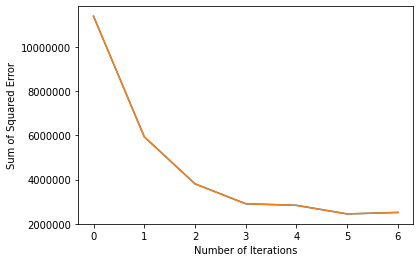

In [38]:
#Solving using stochastic gradient descent: learningRate=0.0004, tolerance=0.005, maxIteration=50000, gd=False, ,sgd=True, reg=False
Model1=LinearRegression(X,y.to_numpy(),
                            learningRate=0.0004, tolerance=0.005, maxIteration=50000,gd=False,sgd=True, reg=False)
Model1.fitModel()

1
2
3
Data is Full Rank
check Matrix
Data is not low Rank
check Invertibility
Solving using stochastic gradient descent
inside sgd 


  0%|          | 2/50000 [00:00<37:32, 22.19it/s]


The SGD model with regularization has stopped learning

Weights: [318.32865694  13.01368698 -15.75436754  65.21625068  51.68514581
  29.1824876   30.70360918   4.48932179  11.9410977 ]
Errors in train dataset:

RMSE: 198.3582137214965
SSE: 11570236542.31102

Errors in test dataset:
RMSE: 198.38214025309733
SSE: 4959891623.256346


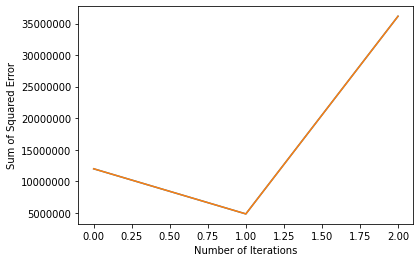

In [39]:
#Solving using stochastic gradient descent: learningRate=0.0004, tolerance=0.005, maxIteration=50000, gd=False, ,sgd=True, reg=True
Model1=LinearRegression(X,y.to_numpy(),
                            learningRate=0.0004, tolerance=0.005, maxIteration=50000,gd=False,sgd=True, reg=True)
Model1.fitModel()

In [40]:
#Closed Form Solution: learningRate=0.0004, tolerance=0.005, maxIteration=50000, gd=False, ,sgd=False, reg=False
Model1=LinearRegression(X,y, learningRate=0.04, tolerance=0.05, 
                        maxIteration=5000,gd=False,reg=False,sgd=False)
Model1.fitModel()

1
2
3
Data is Full Rank
check Matrix
Data is not low Rank
check Invertibility
Solving using closed form solution
reg==False

Weights: [153.05748749   0.27621337  -2.52022818  47.56296353  -0.17197961
  16.89128779   5.59954117  -1.52234996   1.96033238]
Errors in train dataset:

RMSE: 49.05230101183196
SSE: 707555693.1662903

Errors in test dataset:
RMSE: 49.300491990316566
SSE: 306315907.3996894


1
2
3
Data is Full Rank
check Matrix
Data is not low Rank
check Invertibility
Solving using gradient descent


100%|██████████| 10/10 [00:00<00:00, 39.71it/s]



Weights: [-7.75360842e+42  1.43846205e+47 -1.03196772e+47 -2.45167181e+47
 -2.34932001e+47  1.39062303e+47 -2.45417357e+47 -1.95550434e+47
 -2.38344822e+47]
Errors in train dataset:

RMSE: 1.1028266998330011e+48
SSE: 3.576484970908885e+101

Errors in test dataset:
RMSE: 1.1019851024623634e+48
SSE: 1.5304476931482153e+101


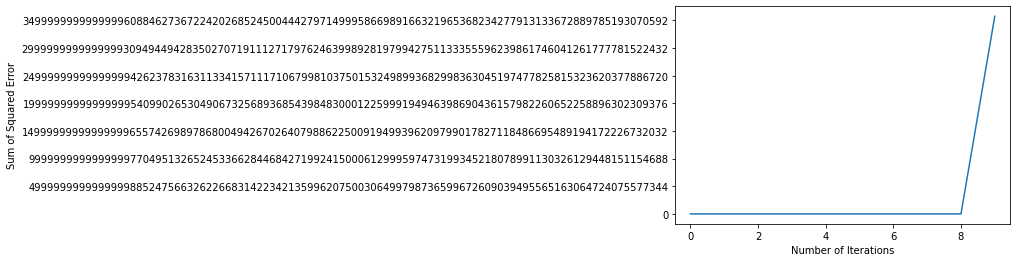

In [41]:
#Solving using gradient descent: learningRate=0.0004, tolerance=0.005, maxIteration=50000, gd=True, ,sgd=False, reg=False
Model1=LinearRegression(X,y.to_numpy(),
                            learningRate=0.04, tolerance=0.05, maxIteration=10,gd=True,reg=False,sgd=False)
Model1.fitModel()

1
2
3
Data is Full Rank
check Matrix
Data is not low Rank
check Invertibility
Solving using stochastic gradient descent
inside sgd 


  0%|          | 0/5000 [00:00<?, ?it/s]

The SGD model without regularization has stopped learning


  0%|          | 1/5000 [00:00<06:44, 12.37it/s]



Weights: [-225513.14328562    5362.71446727   13709.05589062 -145463.80424782
 -143453.11147867   23242.44980469 -123869.53846207  -87045.90906726
 -124554.74383095]
Errors in train dataset:

RMSE: 580247.8937444844
SSE: 9.90077077568682e+16

Errors in test dataset:
RMSE: 579828.9859538086
SSE: 4.237082191826265e+16


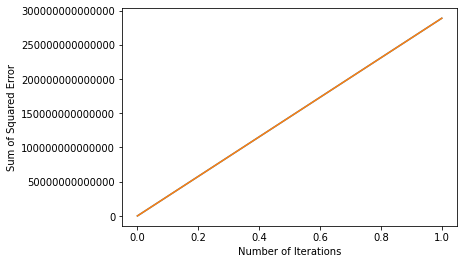

In [42]:
#Solving using stochastic gradient descent: learningRate=0.0004, tolerance=0.005, maxIteration=50000, gd=False, ,sgd=True, reg=False
Model1=LinearRegression(X,y.to_numpy(),
                            learningRate=0.04, tolerance=0.05, maxIteration=5000,gd=False,reg=False,sgd=True)
Model1.fitModel()

1
2
3
Data is Full Rank
check Matrix
Data is not low Rank
check Invertibility
Solving using stochastic gradient descent
inside sgd 


  0%|          | 0/5000 [00:00<?, ?it/s]

The SGD model with regularization has stopped learning


  0%|          | 1/5000 [00:00<04:55, 16.91it/s]



Weights: [-215157.39853465   56540.72917831  -12698.16850607 -264816.92842697
 -252052.40704087   62801.12768404 -256589.64615932 -192634.85598963
 -230987.04854272]
Errors in train dataset:

RMSE: 1065294.2989909262
SSE: 3.337191019023769e+17

Errors in test dataset:
RMSE: 1064612.522993093
SSE: 1.4284011303340371e+17


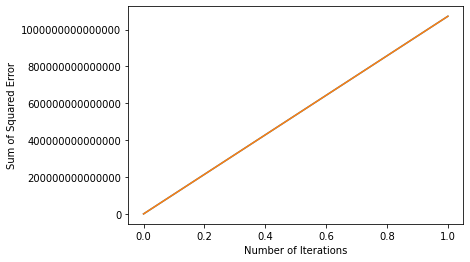

In [43]:
#Solving using stochastic gradient descent: learningRate=0.0004, tolerance=0.005, maxIteration=50000, gd=False, ,sgd=True, reg=True
Model1=LinearRegression(X,y.to_numpy(),
                            learningRate=0.04, tolerance=0.05, maxIteration=5000,gd=False,reg=True,sgd=True)
Model1.fitModel()

### **Logistic Regression Model**

In [44]:
#Feature engineering for Logistic Regression
def make_enocded_columns(x):
    if x == "Good":
        return 0
    elif x == "Moderate":
        return 1
    elif x == "Unhealthy for Sensitive Groups":
        return 2
    elif x == "Unhealthy":
        return 3
    elif x == "Very unhealthy":
        return 4
    elif x == "Hazardous":
        return 5

glued_data["AQI_encoded"] = glued_data["AQI_category"].apply(lambda x: make_enocded_columns(x))

In [45]:
X = glued_data[["TEMP","PRES","PM2.5", "O3_ppm", "CO_ppm", "SO2_ppb", "NO2_ppb"]].to_numpy()
y = glued_data['AQI_encoded'].to_numpy()

In [46]:
class LogisticRegression:
    def __init__(self, X, y, maxIteration,learningRate,regularizer,batch_size):
        self.X = X
        self.y = y
        self.maxIteration = maxIteration
        self.learningRate = learningRate
        self.regularizer = regularizer
        self.batch_size = batch_size

    def addX0(self,X):
        return np.column_stack([np.ones([X.shape[0],1]),X])

    def normalize(self,X):
        mean = np.mean(X,0)
        std = np.std(X,0)
        X_norm = (X-mean)/std
        X_norm = self.addX0(X_norm)
        return X_norm, mean, std

    def normaliseTestData(self, X, mean, std):
        X_norm = (X - mean)/std
        X_norm = self.addX0(X_norm)
        return X_norm

    def gradient_descent(self,X,y,learning_rate,regularizer,maxIteration):
        ohc = OneHotEncoder()
        iteration = 0
        iteration_count_list = [] 
        loss_list = []
        weight_mtrxs = []

        for i in tqdm(range(self.maxIteration)):
            # select random samples from dataset
            random_indices = np.random.choice(X.shape[0],size=self.batch_size,replace=False)
            X_rows = X[random_indices, :]
            y_rows = y[random_indices]
            #encode the classes using onehot encoding
            y_encoded = ohc.fit_transform(y_rows.reshape(-1,1))
            weight_mtrx = np.zeros((X_rows.shape[1], y_encoded.shape[1]))

            Z = - X_rows @ weight_mtrx
            P = softmax(Z, axis=1)
            gd = (1/X_rows.shape[0])*(X_rows.T @ (y_encoded - P)) + 2 * self.regularizer * weight_mtrx

            weight_mtrx = weight_mtrx - (self.learningRate * gd)
            weight_mtrxs.append(weight_mtrx)
            loss_list.append(self.loss_function(X_rows, y_encoded, weight_mtrx))
            iteration += 1
            iteration_count_list.append(iteration)

        plotLossesDF = pd.DataFrame({'iteration': iteration_count_list, 'loss': loss_list})
        return plotLossesDF, weight_mtrx

    def loss_function(self,x, y, weights):
        trace = np.trace(x @ weights @ y.T)
        prob_sum = np.sum(np.log(np.sum(np.exp(- x @ weights), axis=1)))
        loss = ((1/X.shape[0]) *trace) + prob_sum
        return loss

    def fit(self):
        self.X_train, self.X_test,self.y_train,self.y_test=train_test_split(self.X,self.y,
                                                                            test_size=0.3,
                                                                            random_state=42)
        self.X_train, self.mean, self.std = self.normalize(self.X_train)
        self.X_test = self.normaliseTestData(self.X_test,self.mean,self.std)

        #printing dimensions of all datasets
        print('X_train dimension= ', self.X_train.shape)
        print('X_test dimension= ', self.X_test.shape)
        print('y_train dimension= ', self.y_train.shape)
        print('y_test dimension= ', self.y_test.shape)
        print('X_train type= ', type(self.X_train))
        print('X_test type= ', type(self.X_test))
        print('y_train type= ', type(self.y_train))
        print('y_test type= ', type(self.y_test))

        #printing gradient descent
        self.loss_mtrx, self.W = self.gradient_descent(self.X_train, self.y_train,
                                                       self.maxIteration,
                                                       self.learningRate,self.regularizer)
        #plot losses
        self.loss_mtrx.plot(x='iteration', y='loss',xlabel='iteration',ylabel='loss')

        #predicting values
        y_hat_test = np.array(self.predict(self.X_test,self.W))
        print("y_hat_test dimension= ", y_hat_test.shape)
        print("y_hat_test type= ", type(y_hat_test))
        
        #printing evaluation metrics
        accuracy = self.evaluate(self.y_test,y_hat_test)
        print("Performance metrics:")
        print("Accuracy:",accuracy)
    
    def evaluate(self,y_test,y_hat_test):
        correctPred = 0
        for i in range(len(y_hat_test)):
            if ~np.isnan(y_hat_test[i]):
                if ~np.isnan(y_test[i]):
                    if y_hat_test[i] == y_test[i]:
                        correctPred += 1
            else:
                continue
        accuracy = correctPred/len(y_hat_test)*100
        print(classification_report(y_test,y_hat_test,
                                    target_names = ['Good', 'Moderate', 
                                                    'Unhealthy for Sensitive Groups','Unhealthy',
                                                   'Very unhealthy','Hazardous']))
        self.plot_ConfusionMatrix(y_test,y_hat_test)
        return accuracy
    
    def plot_ConfusionMatrix(self,y_test,y_hat_test):
        cm = confusion_matrix(self.y_test,y_hat_test)
        plt.matshow(cm)
        plt.title('Confusion Matrix',fontsize=15)
        plt.xlabel('Predicted Label',color = 'white')
        plt.ylabel('True Label',color = 'white')
        plt.gcf().set_size_inches(10,6)
        plt.show()
        
    def predict(self, X_test,W):
        probability = softmax( - self.X_test @ self.W, axis=1)
        return np.argmax(probability, axis=1)

X_train dimension=  (294064, 8)
X_test dimension=  (126028, 8)
y_train dimension=  (294064,)
y_test dimension=  (126028,)
X_train type=  <class 'numpy.ndarray'>
X_test type=  <class 'numpy.ndarray'>
y_train type=  <class 'numpy.ndarray'>
y_test type=  <class 'numpy.ndarray'>


100%|██████████| 100/100 [00:01<00:00, 70.48it/s]


y_hat_test dimension=  (126028, 1)
y_hat_test type=  <class 'numpy.ndarray'>


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                precision    recall  f1-score   support

                          Good       0.00      0.00      0.00      7882
                      Moderate       0.36      0.70      0.48     25614
Unhealthy for Sensitive Groups       0.00      0.00      0.00     18919
                     Unhealthy       0.49      0.56      0.52     48576
                Very unhealthy       0.44      0.45      0.44     20677
                     Hazardous       0.00      0.00      0.00      4360

                      accuracy                           0.43    126028
                     macro avg       0.22      0.28      0.24    126028
                  weighted avg       0.33      0.43      0.37    126028



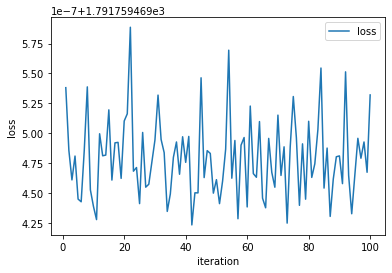

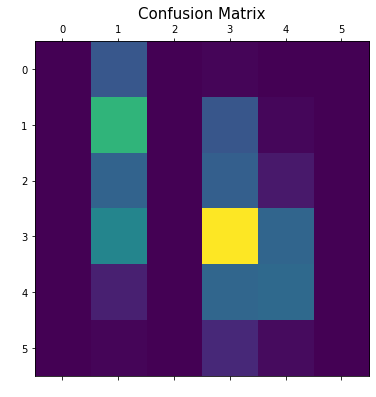

Performance metrics:
Accuracy: 43.218173739169075


In [47]:
lr=LogisticRegression(X,y,maxIteration=100,
                      regularizer=0.001,learningRate=0.1e-3,batch_size=1000)
lr.fit()

X_train dimension=  (294064, 8)
X_test dimension=  (126028, 8)
y_train dimension=  (294064,)
y_test dimension=  (126028,)
X_train type=  <class 'numpy.ndarray'>
X_test type=  <class 'numpy.ndarray'>
y_train type=  <class 'numpy.ndarray'>
y_test type=  <class 'numpy.ndarray'>


100%|██████████| 1000/1000 [00:15<00:00, 63.23it/s]


y_hat_test dimension=  (126028, 1)
y_hat_test type=  <class 'numpy.ndarray'>


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                precision    recall  f1-score   support

                          Good       0.00      0.00      0.00      7882
                      Moderate       0.37      0.65      0.48     25614
Unhealthy for Sensitive Groups       0.21      0.00      0.01     18919
                     Unhealthy       0.49      0.65      0.56     48576
                Very unhealthy       0.49      0.38      0.43     20677
                     Hazardous       0.85      0.08      0.14      4360

                      accuracy                           0.45    126028
                     macro avg       0.40      0.29      0.27    126028
                  weighted avg       0.41      0.45      0.39    126028



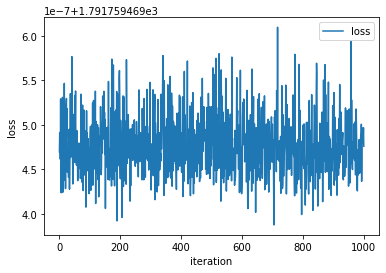

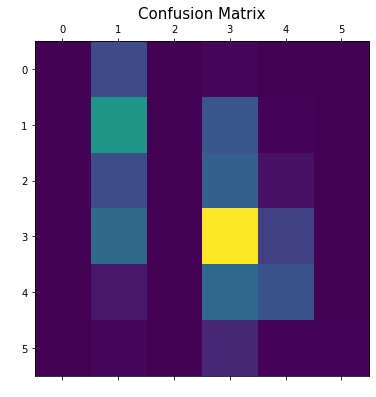

Performance metrics:
Accuracy: 44.95588281969086


In [48]:
lr=LogisticRegression(X,y,maxIteration=1000,
                      regularizer=0.001,learningRate=0.1e-3,batch_size=1000)
lr.fit()

X_train dimension=  (294064, 8)
X_test dimension=  (126028, 8)
y_train dimension=  (294064,)
y_test dimension=  (126028,)
X_train type=  <class 'numpy.ndarray'>
X_test type=  <class 'numpy.ndarray'>
y_train type=  <class 'numpy.ndarray'>
y_test type=  <class 'numpy.ndarray'>


100%|██████████| 1000/1000 [00:16<00:00, 60.55it/s]


y_hat_test dimension=  (126028, 1)
y_hat_test type=  <class 'numpy.ndarray'>


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                precision    recall  f1-score   support

                          Good       0.00      0.00      0.00      7882
                      Moderate       0.38      0.63      0.47     25614
Unhealthy for Sensitive Groups       0.00      0.00      0.00     18919
                     Unhealthy       0.51      0.64      0.57     48576
                Very unhealthy       0.49      0.44      0.46     20677
                     Hazardous       0.43      0.44      0.43      4360

                      accuracy                           0.46    126028
                     macro avg       0.30      0.36      0.32    126028
                  weighted avg       0.37      0.46      0.41    126028



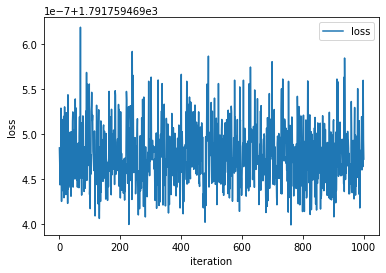

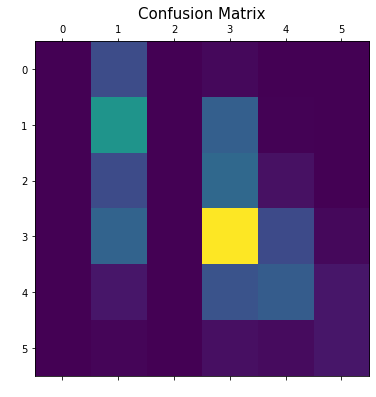

Performance metrics:
Accuracy: 46.07150791887517


In [49]:
lr=LogisticRegression(X,y,maxIteration=1000,
                      regularizer=0.0001,learningRate=0.1e-3,batch_size=1000)
lr.fit()

X_train dimension=  (294064, 8)
X_test dimension=  (126028, 8)
y_train dimension=  (294064,)
y_test dimension=  (126028,)
X_train type=  <class 'numpy.ndarray'>
X_test type=  <class 'numpy.ndarray'>
y_train type=  <class 'numpy.ndarray'>
y_test type=  <class 'numpy.ndarray'>


100%|██████████| 1000/1000 [00:15<00:00, 64.04it/s]


y_hat_test dimension=  (126028, 1)
y_hat_test type=  <class 'numpy.ndarray'>


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                precision    recall  f1-score   support

                          Good       0.00      0.00      0.00      7882
                      Moderate       0.38      0.70      0.49     25614
Unhealthy for Sensitive Groups       0.00      0.00      0.00     18919
                     Unhealthy       0.51      0.68      0.58     48576
                Very unhealthy       0.62      0.32      0.42     20677
                     Hazardous       0.43      0.32      0.36      4360

                      accuracy                           0.47    126028
                     macro avg       0.32      0.34      0.31    126028
                  weighted avg       0.39      0.47      0.41    126028



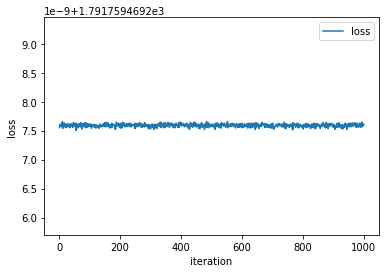

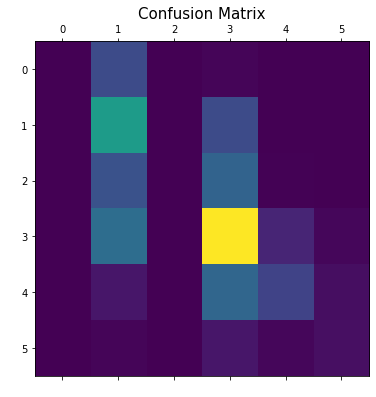

Performance metrics:
Accuracy: 46.78642841273368


In [50]:
lr=LogisticRegression(X,y,maxIteration=1000,
                      regularizer=0.0001,learningRate=0.1e-5,batch_size=1000)
lr.fit()

X_train dimension=  (294064, 8)
X_test dimension=  (126028, 8)
y_train dimension=  (294064,)
y_test dimension=  (126028,)
X_train type=  <class 'numpy.ndarray'>
X_test type=  <class 'numpy.ndarray'>
y_train type=  <class 'numpy.ndarray'>
y_test type=  <class 'numpy.ndarray'>


100%|██████████| 5000/5000 [01:21<00:00, 61.40it/s]


y_hat_test dimension=  (126028, 1)
y_hat_test type=  <class 'numpy.ndarray'>


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                precision    recall  f1-score   support

                          Good       0.00      0.00      0.00      7882
                      Moderate       0.38      0.64      0.48     25614
Unhealthy for Sensitive Groups       0.00      0.00      0.00     18919
                     Unhealthy       0.51      0.66      0.58     48576
                Very unhealthy       0.51      0.49      0.50     20677
                     Hazardous       0.00      0.00      0.00      4360

                      accuracy                           0.47    126028
                     macro avg       0.23      0.30      0.26    126028
                  weighted avg       0.36      0.47      0.40    126028



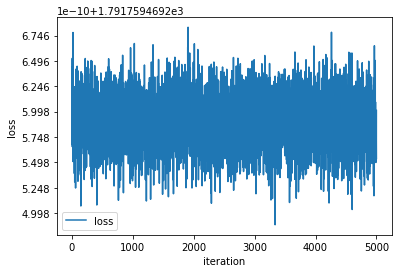

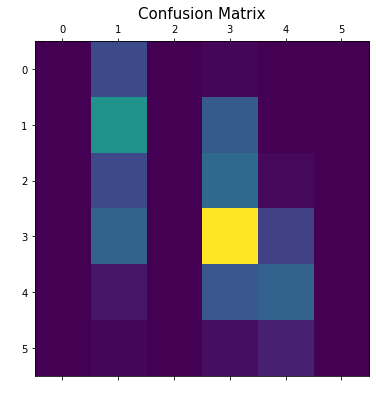

Performance metrics:
Accuracy: 46.659472498175006


In [51]:
lr=LogisticRegression(X,y,maxIteration=5000,
                      regularizer=0.0001,learningRate=0.1e-5,batch_size=1000)
lr.fit()

X_train dimension=  (294064, 8)
X_test dimension=  (126028, 8)
y_train dimension=  (294064,)
y_test dimension=  (126028,)
X_train type=  <class 'numpy.ndarray'>
X_test type=  <class 'numpy.ndarray'>
y_train type=  <class 'numpy.ndarray'>
y_test type=  <class 'numpy.ndarray'>


100%|██████████| 10000/10000 [02:51<00:00, 58.24it/s]


y_hat_test dimension=  (126028, 1)
y_hat_test type=  <class 'numpy.ndarray'>


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                precision    recall  f1-score   support

                          Good       0.00      0.00      0.00      7882
                      Moderate       0.38      0.52      0.44     25614
Unhealthy for Sensitive Groups       0.00      0.00      0.00     18919
                     Unhealthy       0.47      0.57      0.51     48576
                Very unhealthy       0.46      0.63      0.53     20677
                     Hazardous       0.02      0.02      0.02      4360

                      accuracy                           0.43    126028
                     macro avg       0.22      0.29      0.25    126028
                  weighted avg       0.33      0.43      0.37    126028



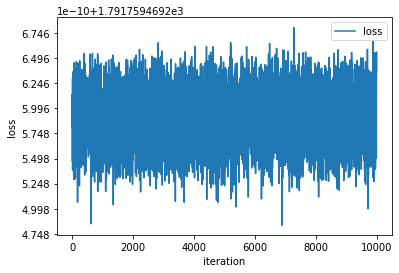

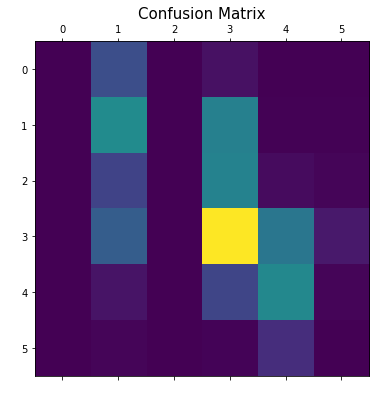

Performance metrics:
Accuracy: 42.843653791221


In [52]:
lr=LogisticRegression(X,y,maxIteration=10000,
                      regularizer=0.0001,learningRate=0.1e-5,batch_size=1000)
lr.fit()

X_train dimension=  (294064, 8)
X_test dimension=  (126028, 8)
y_train dimension=  (294064,)
y_test dimension=  (126028,)
X_train type=  <class 'numpy.ndarray'>
X_test type=  <class 'numpy.ndarray'>
y_train type=  <class 'numpy.ndarray'>
y_test type=  <class 'numpy.ndarray'>


100%|██████████| 100/100 [00:39<00:00,  2.56it/s]


y_hat_test dimension=  (126028, 1)
y_hat_test type=  <class 'numpy.ndarray'>


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                precision    recall  f1-score   support

                          Good       0.00      0.00      0.00      7882
                      Moderate       0.37      0.69      0.48     25614
Unhealthy for Sensitive Groups       0.00      0.00      0.00     18919
                     Unhealthy       0.50      0.64      0.56     48576
                Very unhealthy       0.52      0.38      0.44     20677
                     Hazardous       0.87      0.08      0.15      4360

                      accuracy                           0.45    126028
                     macro avg       0.38      0.30      0.27    126028
                  weighted avg       0.38      0.45      0.39    126028



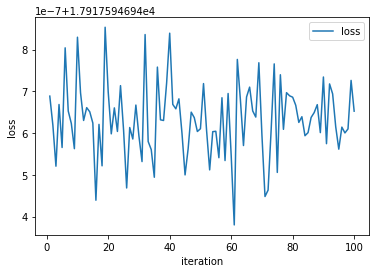

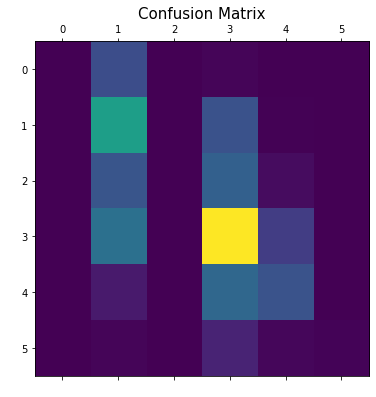

Performance metrics:
Accuracy: 45.40578284190815


In [53]:
lr=LogisticRegression(X,y,maxIteration=100,
                      regularizer=0.1,learningRate=0.1e-3,batch_size=10000)
lr.fit()

X_train dimension=  (294064, 8)
X_test dimension=  (126028, 8)
y_train dimension=  (294064,)
y_test dimension=  (126028,)
X_train type=  <class 'numpy.ndarray'>
X_test type=  <class 'numpy.ndarray'>
y_train type=  <class 'numpy.ndarray'>
y_test type=  <class 'numpy.ndarray'>


100%|██████████| 1000/1000 [06:31<00:00,  2.56it/s]


y_hat_test dimension=  (126028, 1)
y_hat_test type=  <class 'numpy.ndarray'>


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                precision    recall  f1-score   support

                          Good       0.00      0.00      0.00      7882
                      Moderate       0.37      0.70      0.48     25614
Unhealthy for Sensitive Groups       0.00      0.00      0.00     18919
                     Unhealthy       0.52      0.62      0.56     48576
                Very unhealthy       0.48      0.46      0.47     20677
                     Hazardous       0.00      0.00      0.00      4360

                      accuracy                           0.46    126028
                     macro avg       0.23      0.30      0.25    126028
                  weighted avg       0.35      0.46      0.39    126028



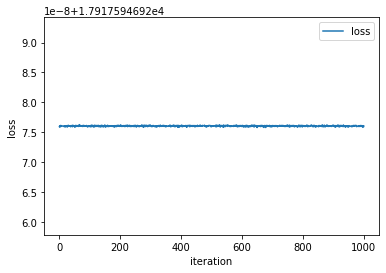

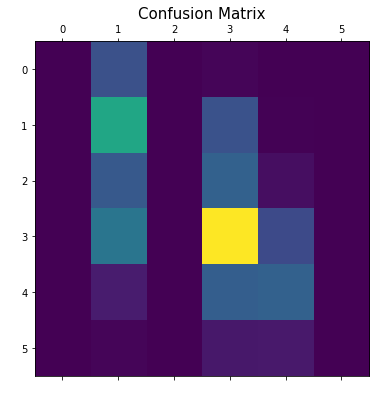

Performance metrics:
Accuracy: 45.58590154568826


In [54]:
lr=LogisticRegression(X,y,maxIteration=1000,
                      regularizer=0.01,learningRate=0.1e-5,batch_size=10000)
lr.fit()

X_train dimension=  (294064, 8)
X_test dimension=  (126028, 8)
y_train dimension=  (294064,)
y_test dimension=  (126028,)
X_train type=  <class 'numpy.ndarray'>
X_test type=  <class 'numpy.ndarray'>
y_train type=  <class 'numpy.ndarray'>
y_test type=  <class 'numpy.ndarray'>


100%|██████████| 1000/1000 [06:32<00:00,  2.55it/s]


y_hat_test dimension=  (126028, 1)
y_hat_test type=  <class 'numpy.ndarray'>


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                precision    recall  f1-score   support

                          Good       0.00      0.00      0.00      7882
                      Moderate       0.38      0.69      0.49     25614
Unhealthy for Sensitive Groups       0.00      0.00      0.00     18919
                     Unhealthy       0.51      0.66      0.57     48576
                Very unhealthy       0.51      0.40      0.45     20677
                     Hazardous       0.71      0.00      0.01      4360

                      accuracy                           0.46    126028
                     macro avg       0.35      0.29      0.25    126028
                  weighted avg       0.38      0.46      0.39    126028



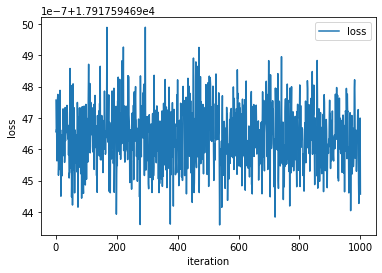

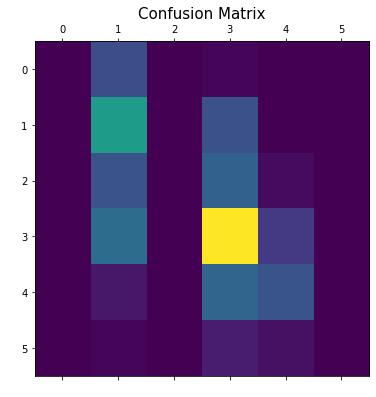

Performance metrics:
Accuracy: 45.77871584092424


In [55]:
lr=LogisticRegression(X,y,maxIteration=1000,
                      regularizer=0.0001,learningRate=0.1e-3,batch_size=10000)
lr.fit()

X_train dimension=  (294064, 8)
X_test dimension=  (126028, 8)
y_train dimension=  (294064,)
y_test dimension=  (126028,)
X_train type=  <class 'numpy.ndarray'>
X_test type=  <class 'numpy.ndarray'>
y_train type=  <class 'numpy.ndarray'>
y_test type=  <class 'numpy.ndarray'>


100%|██████████| 1000/1000 [06:27<00:00,  2.58it/s]


y_hat_test dimension=  (126028, 1)
y_hat_test type=  <class 'numpy.ndarray'>


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                precision    recall  f1-score   support

                          Good       0.00      0.00      0.00      7882
                      Moderate       0.37      0.70      0.48     25614
Unhealthy for Sensitive Groups       0.00      0.00      0.00     18919
                     Unhealthy       0.50      0.64      0.56     48576
                Very unhealthy       0.52      0.39      0.44     20677
                     Hazardous       0.87      0.06      0.10      4360

                      accuracy                           0.45    126028
                     macro avg       0.38      0.30      0.27    126028
                  weighted avg       0.39      0.45      0.39    126028



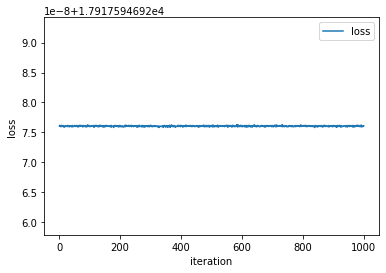

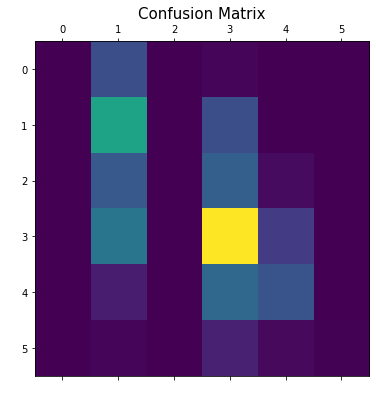

Performance metrics:
Accuracy: 45.48830418637128


In [63]:
lr=LogisticRegression(X,y,maxIteration=1000,
                      regularizer=0.0001,learningRate=0.1e-5,batch_size=10000)
lr.fit()

X_train dimension=  (294064, 8)
X_test dimension=  (126028, 8)
y_train dimension=  (294064,)
y_test dimension=  (126028,)
X_train type=  <class 'numpy.ndarray'>
X_test type=  <class 'numpy.ndarray'>
y_train type=  <class 'numpy.ndarray'>
y_test type=  <class 'numpy.ndarray'>


100%|██████████| 1000/1000 [07:00<00:00,  2.38it/s]


y_hat_test dimension=  (126028, 1)
y_hat_test type=  <class 'numpy.ndarray'>


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                precision    recall  f1-score   support

                          Good       0.00      0.00      0.00      7882
                      Moderate       0.37      0.71      0.49     25614
Unhealthy for Sensitive Groups       0.00      0.00      0.00     18919
                     Unhealthy       0.52      0.62      0.57     48576
                Very unhealthy       0.51      0.42      0.46     20677
                     Hazardous       0.56      0.23      0.32      4360

                      accuracy                           0.46    126028
                     macro avg       0.33      0.33      0.31    126028
                  weighted avg       0.38      0.46      0.40    126028



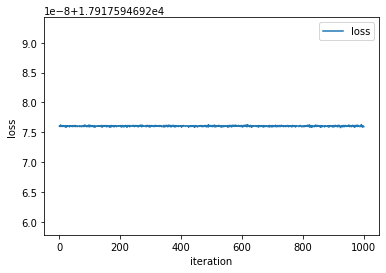

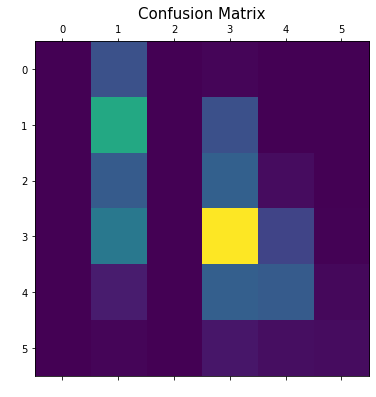

Performance metrics:
Accuracy: 45.98343225315009


In [62]:
lr=LogisticRegression(X,y,maxIteration=5000,
                      regularizer=0.0001,learningRate=0.1e-5,batch_size=10000)
lr.fit()

Note: Reducing the number of maxIteration from 10000 to 100 for the below cell as it takes almost 1.5 hours to run.

X_train dimension=  (294064, 8)
X_test dimension=  (126028, 8)
y_train dimension=  (294064,)
y_test dimension=  (126028,)
X_train type=  <class 'numpy.ndarray'>
X_test type=  <class 'numpy.ndarray'>
y_train type=  <class 'numpy.ndarray'>
y_test type=  <class 'numpy.ndarray'>


100%|██████████| 10000/10000 [1:05:19<00:00,  2.55it/s]


y_hat_test dimension=  (126028, 1)
y_hat_test type=  <class 'numpy.ndarray'>


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                precision    recall  f1-score   support

                          Good       0.00      0.00      0.00      7882
                      Moderate       0.37      0.71      0.49     25614
Unhealthy for Sensitive Groups       0.00      0.00      0.00     18919
                     Unhealthy       0.51      0.63      0.56     48576
                Very unhealthy       0.52      0.40      0.45     20677
                     Hazardous       0.70      0.10      0.17      4360

                      accuracy                           0.46    126028
                     macro avg       0.35      0.31      0.28    126028
                  weighted avg       0.38      0.46      0.40    126028



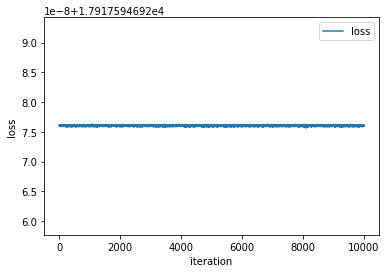

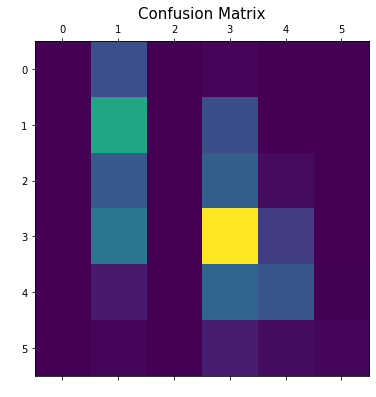

Performance metrics:
Accuracy: 45.631129590249785


In [64]:
lr=LogisticRegression(X,y,maxIteration=100,
                      regularizer=0.0001,learningRate=0.1e-5,batch_size=10000)
lr.fit()

### **Naive Bayes Model**

Feature engineering for Naive Bayes

In [56]:
X = glued_data[["TEMP","PRES","PM2.5","O3_ppm", "CO_ppm", "SO2_ppb", "NO2_ppb"]].to_numpy()
def get_AQI_category(x):
    if x <= 50:
        return 0
    elif x <= 100:
        return 1
    elif x <= 150:
        return 2
    elif x <= 200:
        return 3
    elif x <= 300:
        return 4
    elif x > 300:
        return 5
    else:
        return 6

glued_data["AQI_categories"] = glued_data["AQI_calculated"].apply(lambda x: get_AQI_category(x))
y = glued_data["AQI_categories"].to_numpy()

In [57]:
class NaiveBayes:
    def __init__(self,X,y,batch_size):
        self.X = X
        self.y = y
        self.batch_size = batch_size
        
    def fitModel(self):
        self.X_train, self.X_test,self.y_train,self.y_test=train_test_split(self.X,self.y,
                                                                            test_size = self.batch_size,
                                                                            random_state=42)
        self.classes = len(np.unique(self.y_train))
        self.Samples, self.dimensions = self.X_train.shape

        self.mean = np.ones((self.classes, self.dimensions)) * 0
        self.variance = np.ones((self.classes, self.dimensions)) * 0
        self.priors = np.ones(self.classes) * 0

        for c in range(self.classes):
            X_train_c = self.X_train[self.y_train == c]
            self.mean[c, :] = np.mean(X_train_c, axis=0)
            self.variance[c, :] = np.var(X_train_c, axis=0)
            self.priors[c] = X_train_c.shape[0] / self.Samples
        
        #predict values on testing data
        self.predict(self.X_test)

    def predict(self,X):
        y_hat = [self.calculate_posteriors(x) for x in X]
        self.evaluatePerformance(y_hat)

    def calculate_posteriors(self, x):
        posteriors = []

        for c in range(self.classes):
            class_mean = self.mean[c]
            class_variance = self.variance[c]
            prior = np.log(self.priors[c])

            posterior = np.sum(np.log(self.gaussianDensity(x, class_mean, class_variance)))
            posterior = prior + posterior
            posteriors.append(posterior)

        return np.argmax(posteriors)

    def gaussianDensity(self, x, mean, var):
        const = 1 / np.sqrt(var * 2 * np.pi)
        proba = np.exp(-0.5 * ((x - mean) ** 2 / var))
        return const * proba
    
    def evaluatePerformance(self,y_hat):
        accuracy = np.sum(self.y_test==y_hat) / len(self.y_test)

        #plot confusion matrix
        cm_nb = confusion_matrix(self.y_test,y_hat)

        plt.matshow(cm_nb,cmap='jet')
        plt.title('Confusion Matrix for Naive Bayes',fontsize=15)
        plt.xlabel('Predicted Label',color = 'white')
        plt.ylabel('True Label',color = 'white')
        plt.gcf().set_size_inches(10,6)
        plt.show()
        
        TP = np.diag(cm_nb)
        FP = np.sum(cm_nb, axis=0) - TP
        FN = np.sum(cm_nb, axis=1) - TP
        num_classes = 6
        TN = []
        for i in range(num_classes):
            temp = np.delete(cm_nb, i, 0)    # delete ith row
            temp = np.delete(temp, i, 1)  # delete ith column
            TN.append(sum(sum(temp)))
        precision = TP/(TP+FP)
        recall = TP/(TP+FN)
        print('Performance metrics:')
        print('Accuracy: ',accuracy)
        print('Precision: ',precision)
        print('Recall: ', recall)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: RuntimeWarning: divide by zero encountered in log


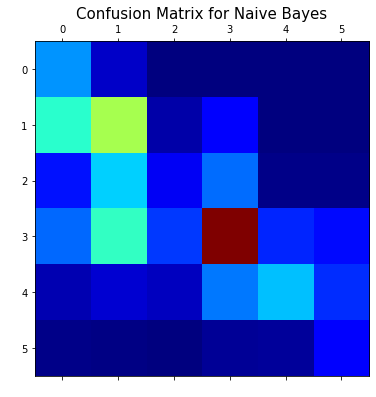

Performance metrics:
Accuracy:  0.4318666016020186
Precision:  [0.24867504 0.3837278  0.27249532 0.61770875 0.61876043 0.28514294]
Recall:  [0.79588336 0.49664864 0.12713277 0.47319304 0.34783236 0.65498469]


In [58]:
# instantiate, train and predict Naive Bayes Classifier
NB = NaiveBayes(X, y,batch_size=0.2)
NB.fitModel()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: RuntimeWarning: divide by zero encountered in log


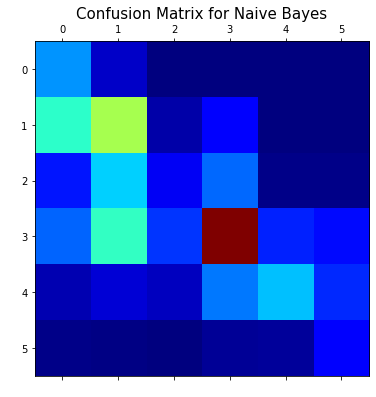

Performance metrics:
Accuracy:  0.43184826180931796
Precision:  [0.24680125 0.38402491 0.27512424 0.61798261 0.61938534 0.28608893]
Recall:  [0.79645206 0.49549171 0.12645939 0.47345615 0.34909049 0.65377281]


In [59]:
NB = NaiveBayes(X, y,batch_size=0.25)
NB.fitModel()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: RuntimeWarning: divide by zero encountered in log


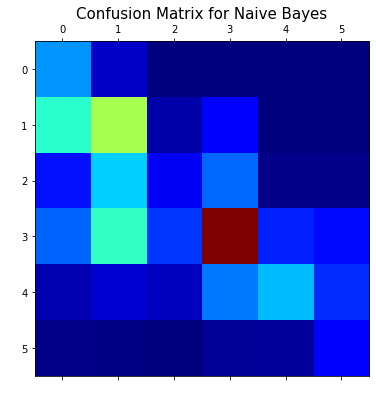

Performance metrics:
Accuracy:  0.43280858221982416
Precision:  [0.24926488 0.38425591 0.27705479 0.6194094  0.61623521 0.2833899 ]
Recall:  [0.79586399 0.49757945 0.12828374 0.47498765 0.347681   0.65114679]


In [60]:
NB = NaiveBayes(X, y,batch_size=0.3)
NB.fitModel()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: RuntimeWarning: divide by zero encountered in log


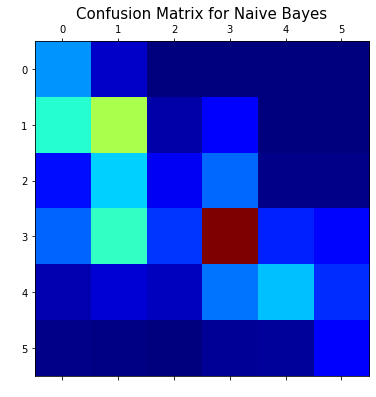

Performance metrics:
Accuracy:  0.4328892153462148
Precision:  [0.24940854 0.384752   0.27640604 0.61864231 0.61622968 0.28230361]
Recall:  [0.79349842 0.49971584 0.12786692 0.47492318 0.34788721 0.64953731]


In [61]:
NB = NaiveBayes(X, y,batch_size=0.35)
NB.fitModel()

# **!! *End of Code* !!**